This project is presented by Racheli Cohen(315247411) and Shayna Shaw(317807451)<br><br>
<B>$28.6 billion was lost to fraud worldwide in 2020, according to Nilson Report.<B>

As long as there’s been currency, there’s been fraud. But not until the 21st century was it so easy for fraudsters to engage in illicit activity, reap the rewards, and evade prosecution and incarceration for their crimes.

Recently, my grandmother went to do her weekly shop at the grocery store, but when she got to the cash register to pay, her credit card didn't go through. From an investigation, it was discovered that there had been a huge transaction from her account, putting her account in a big negative and blocking the use of the card. Finally it turned out that in the same week she donated 1000 dollars to charity, but the clerk who made the transfer accidently transfered 100000 dollars... well, this time it was taken care of and the mistake was corrected Baruch Hashem, but what about all the other cases?? all the times that it is done on purpose and not by accident? This is where we got the idea of our project from, we want to do what we can to help detect and avoid fraud transactions!

In a survey of more than 5,000 respondents across 99 global territories in 2020, PricewaterhouseCoopers (PwC) found that 47 percent had suffered at least one form of fraud in the prior 24 months—averaging six per company. These were commonly customer fraud, cybercrime, asset misappropriation, and bribery and corruption, which cost $42 billion. 

    
We Racheli Cohen and Shayna Shaw In this project will try to tackle this problem and help it by creating an Autoencoder Neural Network (implemented in Keras) for Anomaly Detection in credit card transaction data. The trained model will be evaluated on pre-labeled and anonymized dataset.

Let’s dive deeper in!

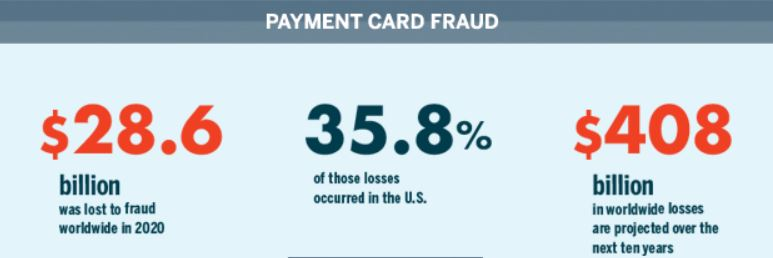

<br>
<h2>Imports

In [1]:
# DataFrame, data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, r2_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Tensorflow + Keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import models, layers
from keras.callbacks import EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np # linear algebra
import os
from collections import Counter
import logging
import time
import pickle
import itertools
from scipy import stats
import seaborn as sns
from pylab import rcParams

!pip install imblearn

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import random
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


<h1><b>1. Loading the data set<b>


The dataset we are going to be using can be downloaded from Kaggle:<br> 
https://www.kaggle.com/datasets/kartik2112/fraud-detection<br>
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.<br>

Here is what our data containes:<br>
<b>trans_date_trans_time</b> - contains the transaction time stamp<br>
<b>cc_num</b> - contains the credit card number<br>
<b>merchant</b> - contains the merchant name<br>
<b>category</b> - contains the transaction category<br>
<b>amt</b> - contains the transaction amount<br>
<b>first</b> - contains the card holders first name<br>
<b>last</b> - contains the card holders last name<br>
<b>street</b> - contains the transaction address<br>
<b>city</b> - contains the transaction city<br>
<b>state</b> - contains the transaction state<br>
<b>zip</b> - contains the transaction zipcode<br>
<b>lat</b> - contains the transaction lattitude<br>
<b>long</b> - contains the transaction longitude<br>
<b>city_pop</b> - contains the population of the city<br>
<b>job</b> - contains the card holders job<br>
<b>dob</b> - contains the card holders date of birth<br>
<b>trans_num</b> - contains the transaction number<br>
<b>unix_time</b> - contains the time in unix format<br>
<b>merch_lat</b> - contains the  lattitude of the merchant<br>
<b>merch_long</b> - contains the longitude of merchant<br>
<b>is_fraud - contains whether the transaction is fraud or not</b><br>

these are going to be the features that we will work with.

In [2]:
#load dataset
Train_dataset_path = "Input/fraudTrain.csv"
Test_dataset_path = "Input/fraudTest.csv"

print("Open file:", Train_dataset_path)
print("Open file:", Test_dataset_path)

df1 = pd.read_csv(Train_dataset_path)
df2 = pd.read_csv(Test_dataset_path)

#amount of training and testing data
print("Train: ", df1.shape)
print("Test: ", df2.shape)


Open file: Input/fraudTrain.csv
Open file: Input/fraudTest.csv
Train:  (1296675, 23)
Test:  (555719, 23)


Lets take a sneak peek at what our data looks like, we can see the columns as explained above.

In [3]:
#concatenate the two datasets
df = pd.concat([df1, df2]).reset_index()
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
#remove unnamed columns
df.drop(df.columns[:2], axis=1, inplace=True)

df.head()

Duplicated values dropped succesfully


trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

<h1><b>2. Pre-processing our data

We can see that the trans_date_trans_time and dob are of type object, lets convert those columns into datetime format


In [5]:
#convert trans_date_trans_time and dob columns into datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

As we can see, now the Dtype of trans_date_trans_time and dob is datetime format

<b>Check for NULL values in our data

In [6]:
df.isnull().values.any()

False

We can see that our data set does not contain any NULL values

<b>Next, In order to get more information from the trans_date_trans_time column, we will separate it into hour, day, and Month-year column, then we will add the new columns to our original dataframe

In [7]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['trans_year_month'] = df['trans_date_trans_time'].dt.to_period('M')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

<b> Next, we will find the age of the customer according to the time of transacting and his date of birth

In [8]:
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1, 'Y'))
df.age[:10]

0    31.0
1    41.0
2    57.0
3    52.0
4    33.0
5    58.0
6    25.0
7    71.0
8    78.0
9    45.0
Name: age, dtype: float64

<b>Now, after we got the information we wanted from the 'trans_date_trans_time' and 'dob' columns, we will drop the columns since they don't add any more needed information for our analysis.
Moreover, the variables 'first' and 'last' are not necessary for our analysis (and in addition this is private information) therefore we will drop these columns too.

In [9]:
#drop unnecessary columns
df.drop('trans_date_trans_time', axis=1, inplace=True)
df.drop('dob', axis=1, inplace=True)
df.drop('first', axis=1, inplace=True)
df.drop('last', axis=1, inplace=True)

<b>Now that our dataframe contains only the required data, we will proceed to process our data.

In [10]:
#take a look at what our data set contains after the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column             Dtype    
---  ------             -----    
 0   cc_num             int64    
 1   merchant           object   
 2   category           object   
 3   amt                float64  
 4   gender             object   
 5   street             object   
 6   city               object   
 7   state              object   
 8   zip                int64    
 9   lat                float64  
 10  long               float64  
 11  city_pop           int64    
 12  job                object   
 13  trans_num          object   
 14  unix_time          int64    
 15  merch_lat          float64  
 16  merch_long         float64  
 17  is_fraud           int64    
 18  trans_hour         int64    
 19  trans_day_of_week  object   
 20  trans_year_month   period[M]
 21  age                float64  
dtypes: float64(6), int64(6), object(9), period[M](1)
memory usage: 325

In [11]:
df.shape

(1852394, 22)

In [12]:
#describe the dataset
df.describe()

cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01  7.199217e-02   
min    2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00   
25%    7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01  0.000000e+00   
50%    2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01  0.000000e+00   
75%    2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01  0.000000e+00   
max    2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00   

         trans_hour           age  
count  1.852394e+06  1.852394e+06  
mean   1.280612e+01  4.626617e+01  
std    6.815753e+00  1.741239e+01  
min    0.000000e+00  1.400000e+01  
25%    7.000000e+00  3.300000e+01  
50%    1.400000e+01  4.400000e+01  
75%    1.900000e+01  5.700000e+01  
max    2.300000e+01  9.600000e+01

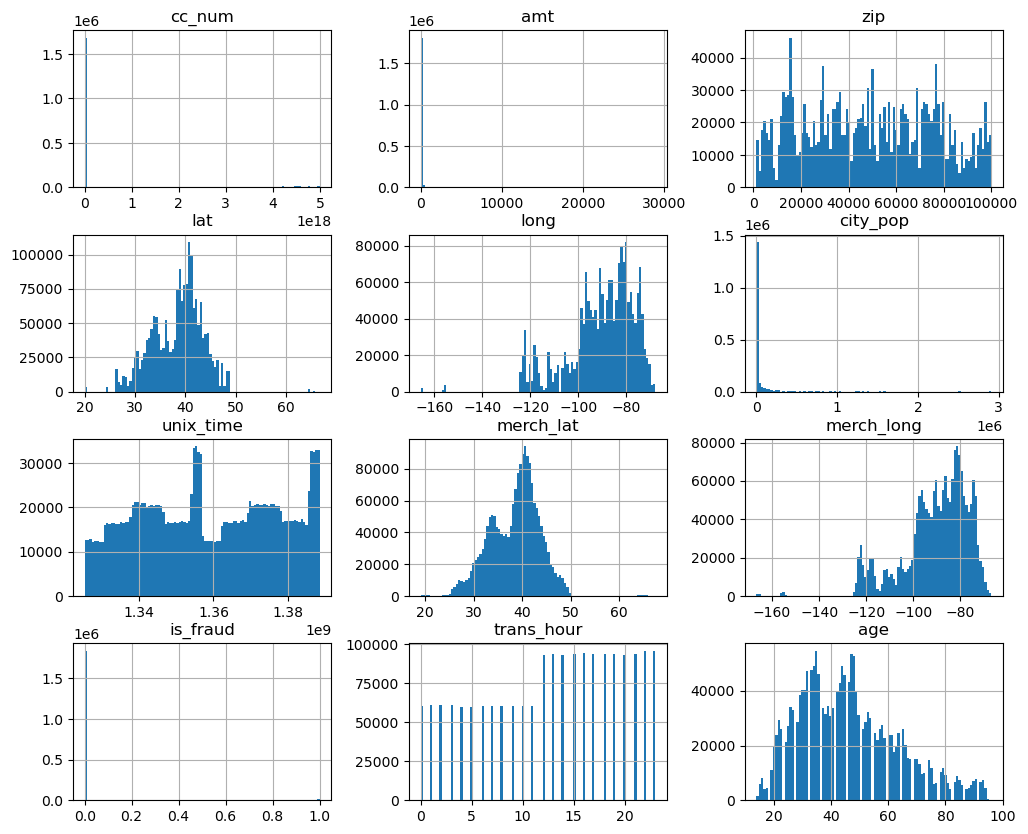

In [13]:
#take a visual look at our data set through the diagrams
df.hist(bins=100, figsize=(12,10))
plt.show()

<b> Now we will check the relationship between the different features and our target is_fraud


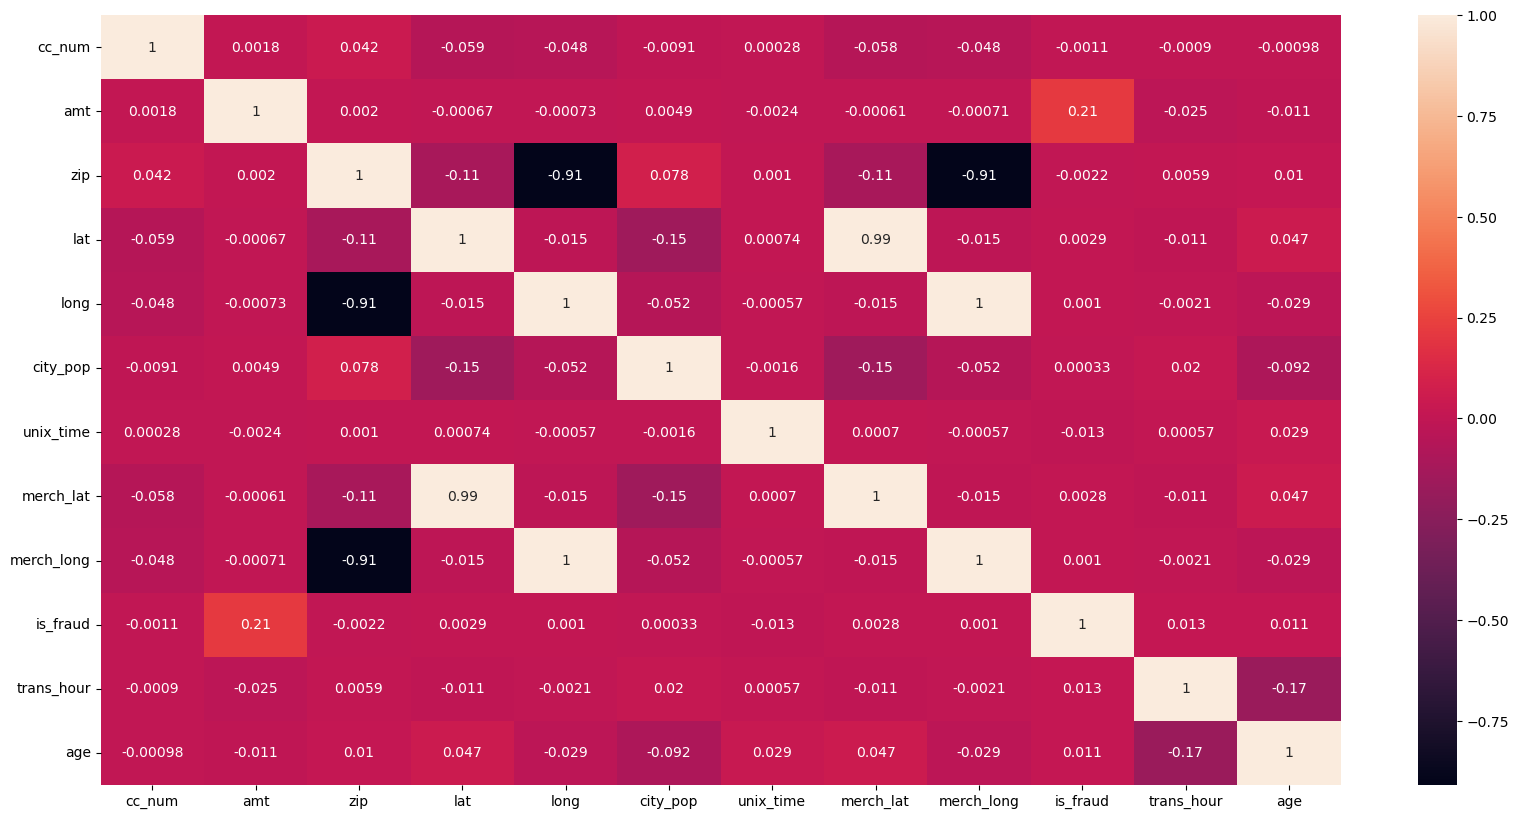

In [14]:
#take a look at the heatmap
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

From the heatmap above we can see for now that the amount is highly correlated with is_fraud.

<h1><b>3. EDA - Exploratory Data Analysis

<b>In this section we will explore and analyze our data, and try to find the features that are most correlated to our target is_fraud, and have the most affect on it.

<b><u>Category:</u></b><br>
Lets review the correlation between category and is_fraud

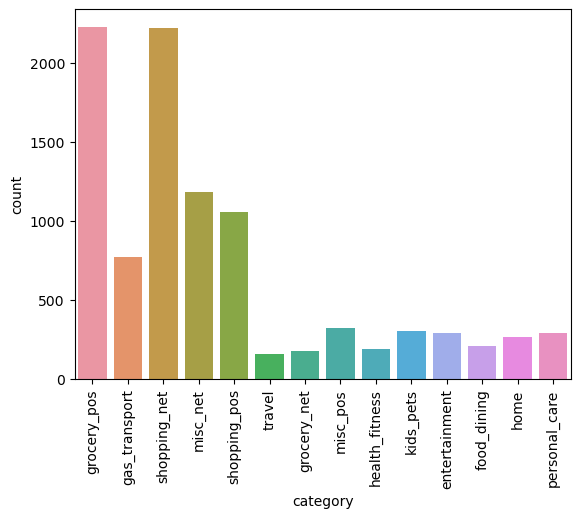

In [15]:
#take a look at the distribution of category
sns.countplot(df[df['is_fraud']==1].category)
plt.xticks(rotation=90)
plt.show()

From the diagram above we can see that the categories with highest percentage of fraud transactions are shopping_net, misc_net, grocery_pos

In [16]:
#lets compare the number of transactions and see the persentage of fraud transactions for each category

df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category', 'All_Transactions']

df_fraud_category = df[['category', 'trans_num', 'is_fraud']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category', 'Is_fraud', 'Fraud_Transactions']

df_fraud_category = df_fraud_category.merge(df_category[['Category', 'All_Transactions']], how='inner', on='Category')
 
df_fraud_category['Fraud_percentage'] = (df_fraud_category['Fraud_Transactions']/df_fraud_category['All_Transactions'])*100

df_fraud_category[df_fraud_category['Is_fraud'] == 1].sort_values(by = ['Fraud_percentage'], ascending=False)


Category  Is_fraud  Fraud_Transactions  All_Transactions  \
23    shopping_net         1                2219            139322   
17        misc_net         1                1182             90654   
9      grocery_pos         1                2228            176191   
25    shopping_pos         1                1056            166463   
5    gas_transport         1                 772            188029   
19        misc_pos         1                 322            114229   
7      grocery_net         1                 175             64878   
27          travel         1                 156             57956   
21   personal_care         1                 290            130085   
1    entertainment         1                 292            134118   
15       kids_pets         1                 304            161727   
3      food_dining         1                 205            130729   
13            home         1                 265            175460   
11  health_fitness         1                 185            122553   

    Fraud_percentage  
23          1.592713  
17          1.303859  
9           1.264537  
25          0.634375  
5           0.410575  
19          0.281890  
7           0.269737  
27          0.269170  
21          0.222931  
1           0.217719  
15          0.187971  
3           0.156813  
13          0.151032  
11          0.150955

According to the table above which is sorted in dessending order, where the category with highest percentage of fraud transactions comes first, we can see that the categories with highest percentage of fraud transactions are shopping_net, misc_net, grocery_pos - which fits perfectly with the previos conclusion!

In [17]:
#categories with more than one percent fraudulent transactions
df_fraud_category.loc[(df_fraud_category.Is_fraud == 1) & (df_fraud_category['Fraud_percentage'] >= 1)].Category

9      grocery_pos
17        misc_net
23    shopping_net
Name: Category, dtype: object

<b><u>Conclusion:</u></b><br> What we see from the distribution of <b><u>category</u></b>,
Most frauds occured in categories of <b>shopping_net, misc_net and grocery_pos

<b><u>Amount:</u></b><br>
Lets review the correlation between amount(amt) and is_fraud

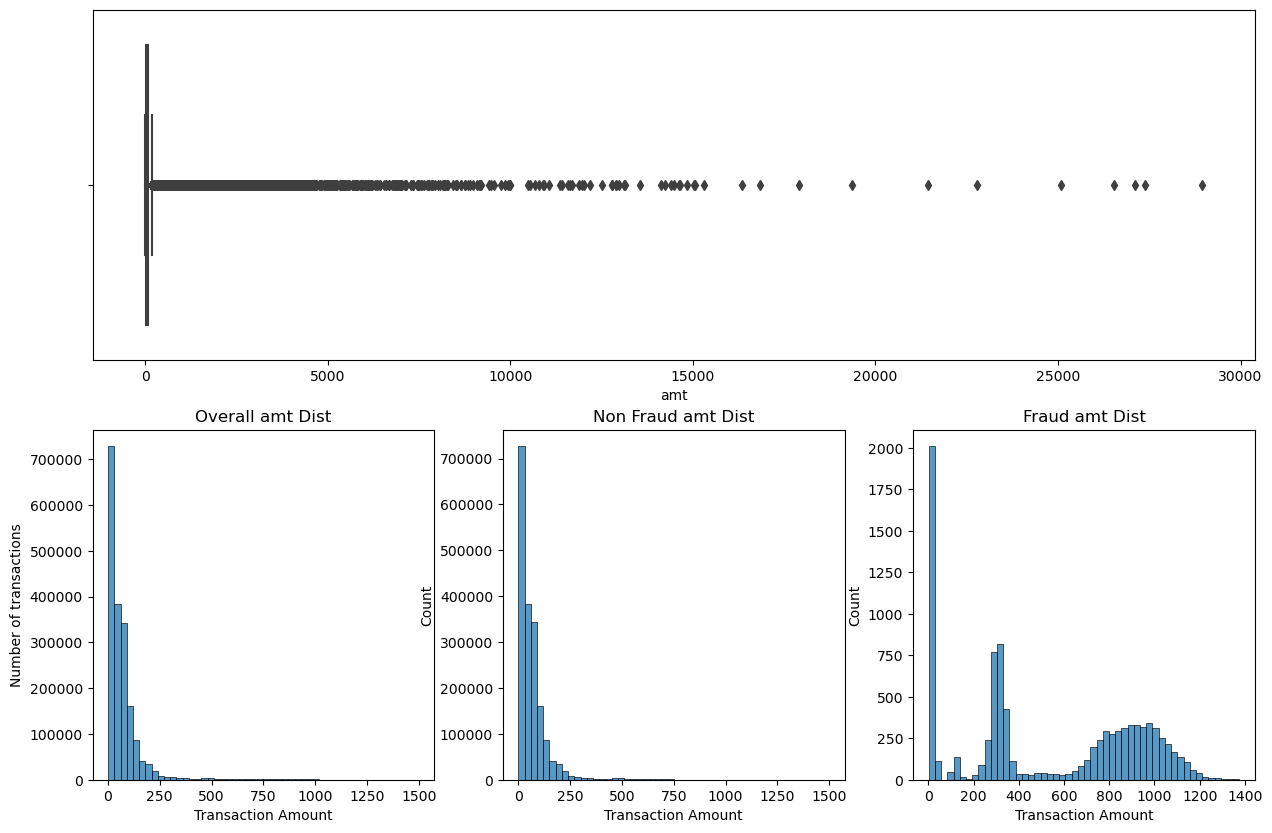

In [18]:
#plot the amt feature
fig = plt.subplots(figsize=(15,10))

plots = []
plots.append(sns.boxplot(df.amt, ax=plt.subplot(211)))

#distribution plots
plots.append(sns.histplot(df[df.amt <= 1500].amt, bins=50, ax=plt.subplot(234)))
plots.append(sns.histplot(df[(df.is_fraud==0) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
plots.append(sns.histplot(df[(df.is_fraud==1) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))

#setting titles
plots[1].set_title('Overall amt Dist')
plots[2].set_title('Non Fraud amt Dist')
plots[3].set_title('Fraud amt Dist')

#setting x labels
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')
plots[3].set_xlabel('Transaction Amount')

#setting y label
plots[1].set_ylabel('Number of transactions')

plt.show()

<b><u>Conclusion:</u></b><br> What we see from the distribution of <b><u>amount</u></b>,
while normal transactions tend to be up to 250USD, we see fraud transactions peak around 300USD and then at the 700-1100 range. <b>clearly, fraud transactions mostly appear in higher amounts


<b><u>Gender:</u></b><br>
Lets review the correlation between gender and is_fraud 

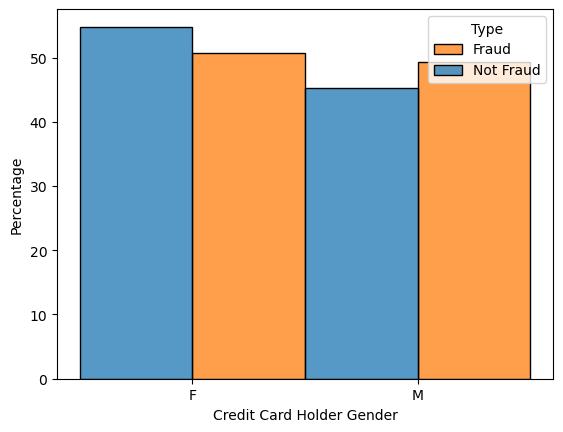

In [19]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])


In [20]:
#lets compare the number of transactions and see the persentage of fraud transactions for Male vs Female

df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender', 'All_Transactions']
df_fraud_gender = df[['gender', 'trans_num', 'is_fraud']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender', 'Is_fraud', 'Fraud_Transactions']
df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender', 'All_Transactions']], how='inner', on='Gender')
df_fraud_gender['Fraud_percentage'] = (df_fraud_gender['Fraud_Transactions']/df_fraud_gender['All_Transactions'])*100
df_fraud_gender[df_fraud_gender['Is_fraud'] == 1].sort_values(by = ['Fraud_percentage'], ascending=False)


Gender  Is_fraud  Fraud_Transactions  All_Transactions  Fraud_percentage
3      M         1                4752            837645          0.567305
1      F         1                4899           1014749          0.482779

<b><u>Conclusion:</u></b><br> What we see from the distribution of <b><u>gender</u></b>,
Although more cases of fraud happened with female customers, the percentage of fraud transactions in relation to all transtactions according to gender are very close, <b>being a bit higher for transactions made by Male costumers.


<b><u>Time:</u></b><br>
Lets review the correlation between time and is_fraud 

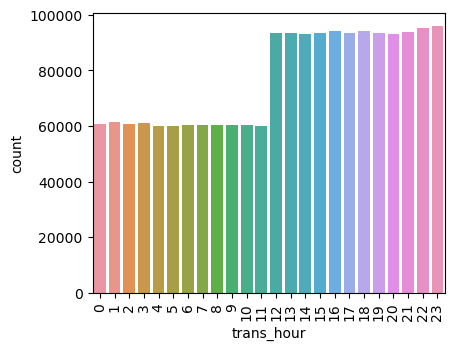

In [21]:
#plot trans_hour features
fix, ax = plt.subplots(figsize=(10,8))

plot = sns.countplot(df.trans_hour, ax = plt.subplot(221))
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

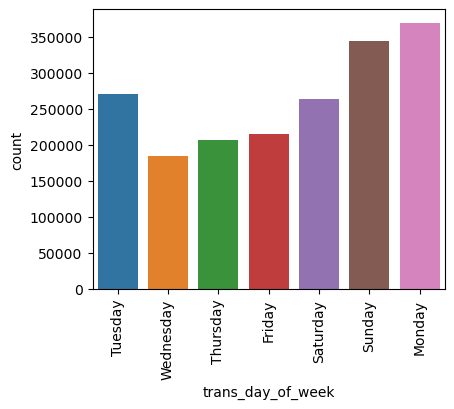

In [22]:
#plot trans_day_of_week features
fix, ax = plt.subplots(figsize=(10,8))

plot = sns.countplot(df.trans_day_of_week, ax = plt.subplot(222))
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

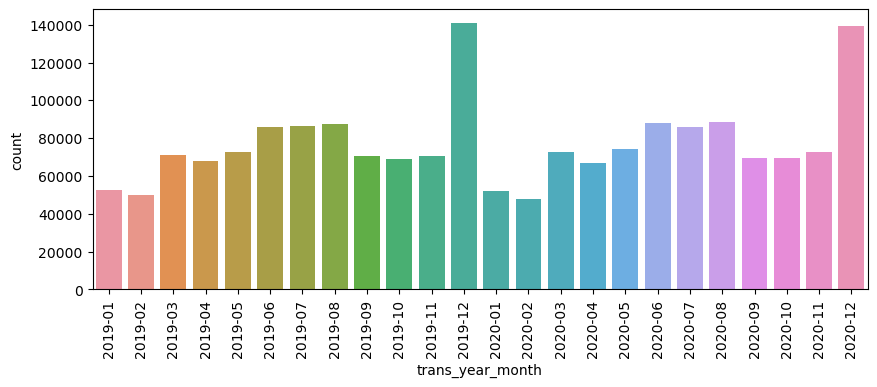

In [23]:
#plot trans_year_month features
fix, ax = plt.subplots(figsize=(10,8))

plot = sns.countplot(df.trans_year_month, ax = plt.subplot(212))
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

We can see from the diagrams above that most transactions happened in the afternoon times of the day, and most transactions have happened at the begining of the week, during Sunday and Monday, and at the month of December.

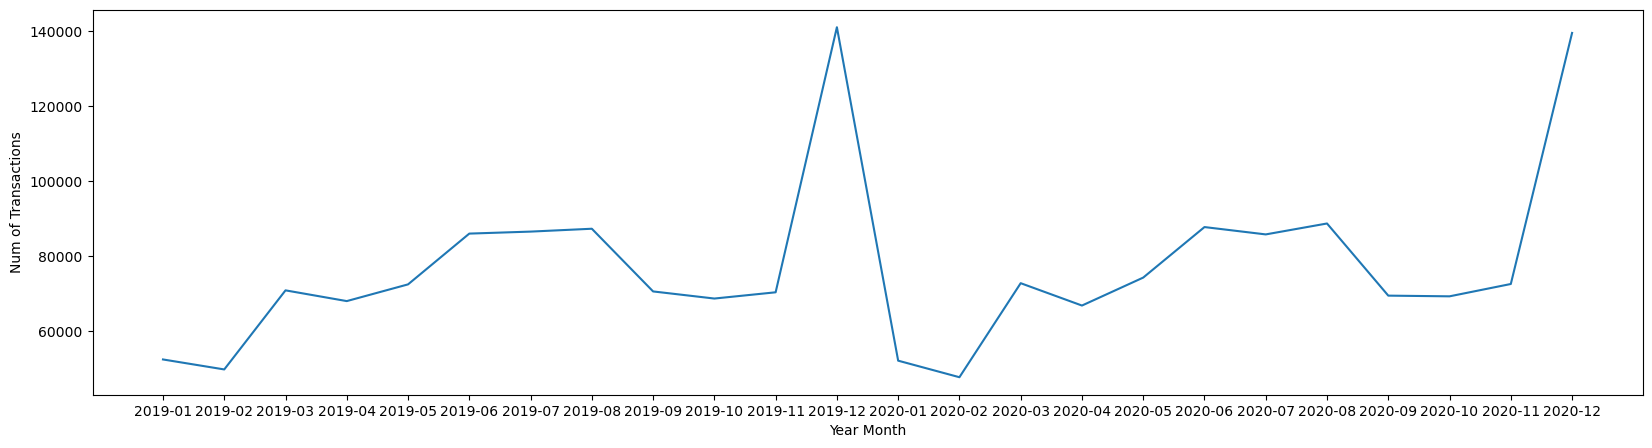

In [24]:
#lets view these plots with respect to the number of transactions.
#year and month vs number of transactions
df_time = df.groupby(df['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_time.columns = ['year_month','num_of_transactions','customers']

x = np.arange(0,len(df_time),1)
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_time['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_time['year_month'])
ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

As we can see, both diagrams are compatible, having December as the month with most transaction 

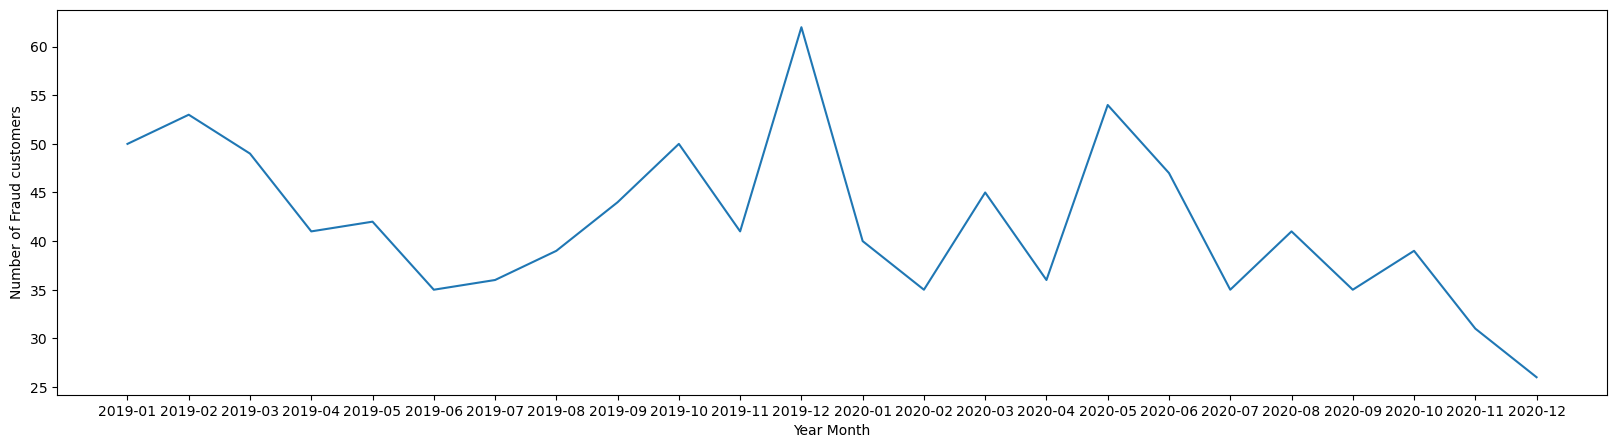

In [25]:
#year_month vs fraud trasactions and fraud customers.
df_fraud_transactions = df[df['is_fraud']==1]

df_time = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_time.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
x = np.arange(0,len(df_time),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_time['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_time['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Fraud customers')
plt.show()

Text(0.5, 0, 'Hour of Day')

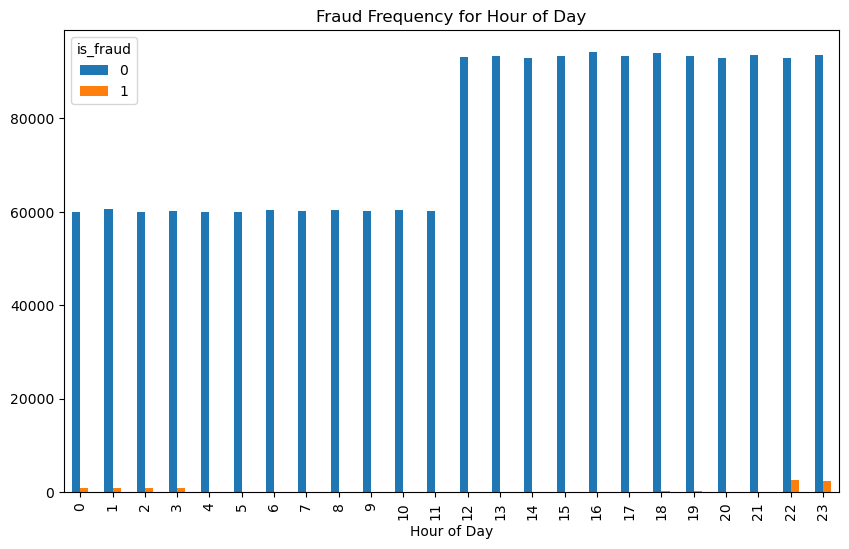

In [26]:

pd.crosstab(df['trans_hour'], df['is_fraud']).plot(kind='bar', figsize=(10, 6)) # Bar chart
plt.title('Fraud Frequency for Hour of Day')
plt.xlabel('Hour of Day') 

<b><u>Conclusion:</u></b><br> What we see from the distribution of <b><u>time</u></b>,
Most fraud transaction happend at the month of December, which makes sence since it is the holiday season.<br>
And, The vast majority of fraud transactions happened between 10pm and 3am, while people are sleeping

<b><u>Age:</u></b><br>
Lets review the correlation between age and is_fraud 

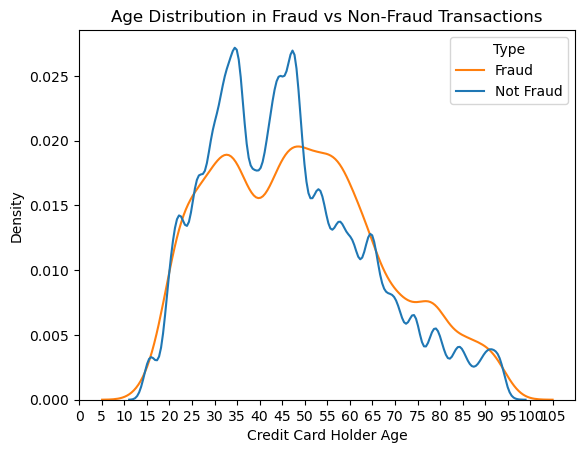

In [27]:
#age vs fraud
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraud vs Non-Fraud Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [28]:
#let us first bin the age feature
for i in range(len(df.age)):
    if df.age[i] <= 25:
        df.age[i] = '< 25'
    elif df.age[i] > 25 and df.age[i] <= 50:
        df.age[i] = '25-50'
    elif df.age[i] > 50 and df.age[i] <= 75:
        df.age[i] = '50-75'
    else:
        df.age[i] = '> 75'

df.age[:10]

0    25-50
1    25-50
2    50-75
3    50-75
4    25-50
5    50-75
6     < 25
7    50-75
8     > 75
9    25-50
Name: age, dtype: object

<b>Lets take a look at the number of transactions according to age group

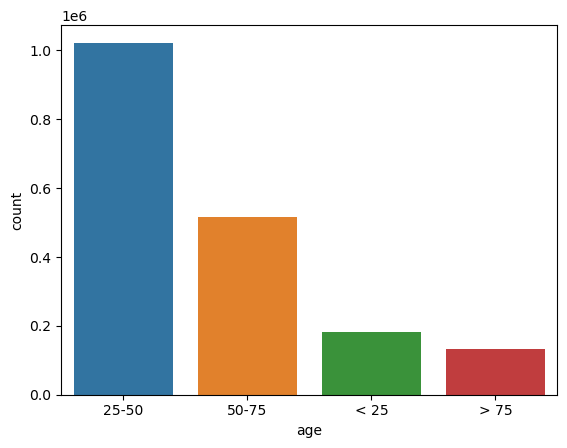

In [29]:
#plotting the age feature in the data
plot = sns.countplot(df.age)
plt.show()

as we can see, most transactions were made by people at the age group of 25-50

Now we will compare the persentage of fraud transactions according to each age group

In [30]:
#lets view the age vs is_fraud, and see the persentage of fraud transactions accourding to age

df_age = df[['age','trans_num']].groupby(['age']).count().reset_index()
df_age.columns = ['Age', 'All_Transactions']
df_fraud_age = df[['age', 'trans_num', 'is_fraud']].groupby(['age','is_fraud']).count().reset_index()
df_fraud_age.columns = ['Age', 'Is_fraud', 'Fraud_Transactions']
df_fraud_age = df_fraud_age.merge(df_age[['Age', 'All_Transactions']], how='inner', on='Age')
df_fraud_age['Fraud_percentage'] = (df_fraud_age['Fraud_Transactions']/df_fraud_age['All_Transactions'])*100
df_fraud_age[df_fraud_age['Is_fraud'] == 1].sort_values(by = ['Fraud_percentage'], ascending=False)


Age  Is_fraud  Fraud_Transactions  All_Transactions  Fraud_percentage
7   > 75         1                1012            131422          0.770039
3  50-75         1                3279            516200          0.635219
5   < 25         1                1001            182706          0.547875
1  25-50         1                4359           1022066          0.426489

<b><u>Conclusion:</u></b><br> What we see from the distribution of <b><u>age</u></b>,
While most fraud transaction happend by people in the 25-50 age group, according to the table above, we can see that the people in the age group of 75 and older have been the most affected, wherein, the highest percentage, about 0.77% of the transaction made by these people have been fraud transactions. This makes sence because the old age people are being targeted by fraudsters trying to take advantage of their lack of knowledge in this praticular erea.<br>

In order to prevent this from happening, 
after we relized that this age group is much prone to frauds, we can monitor their transactions with much more vigilance and it would be helpfull if they can be educated regarding the frauds happening, in order to reduce fraud transactions and prevent it from happening to them.


<b><u>State:</u></b><br>
Lets review the correlation between state and is_fraud 

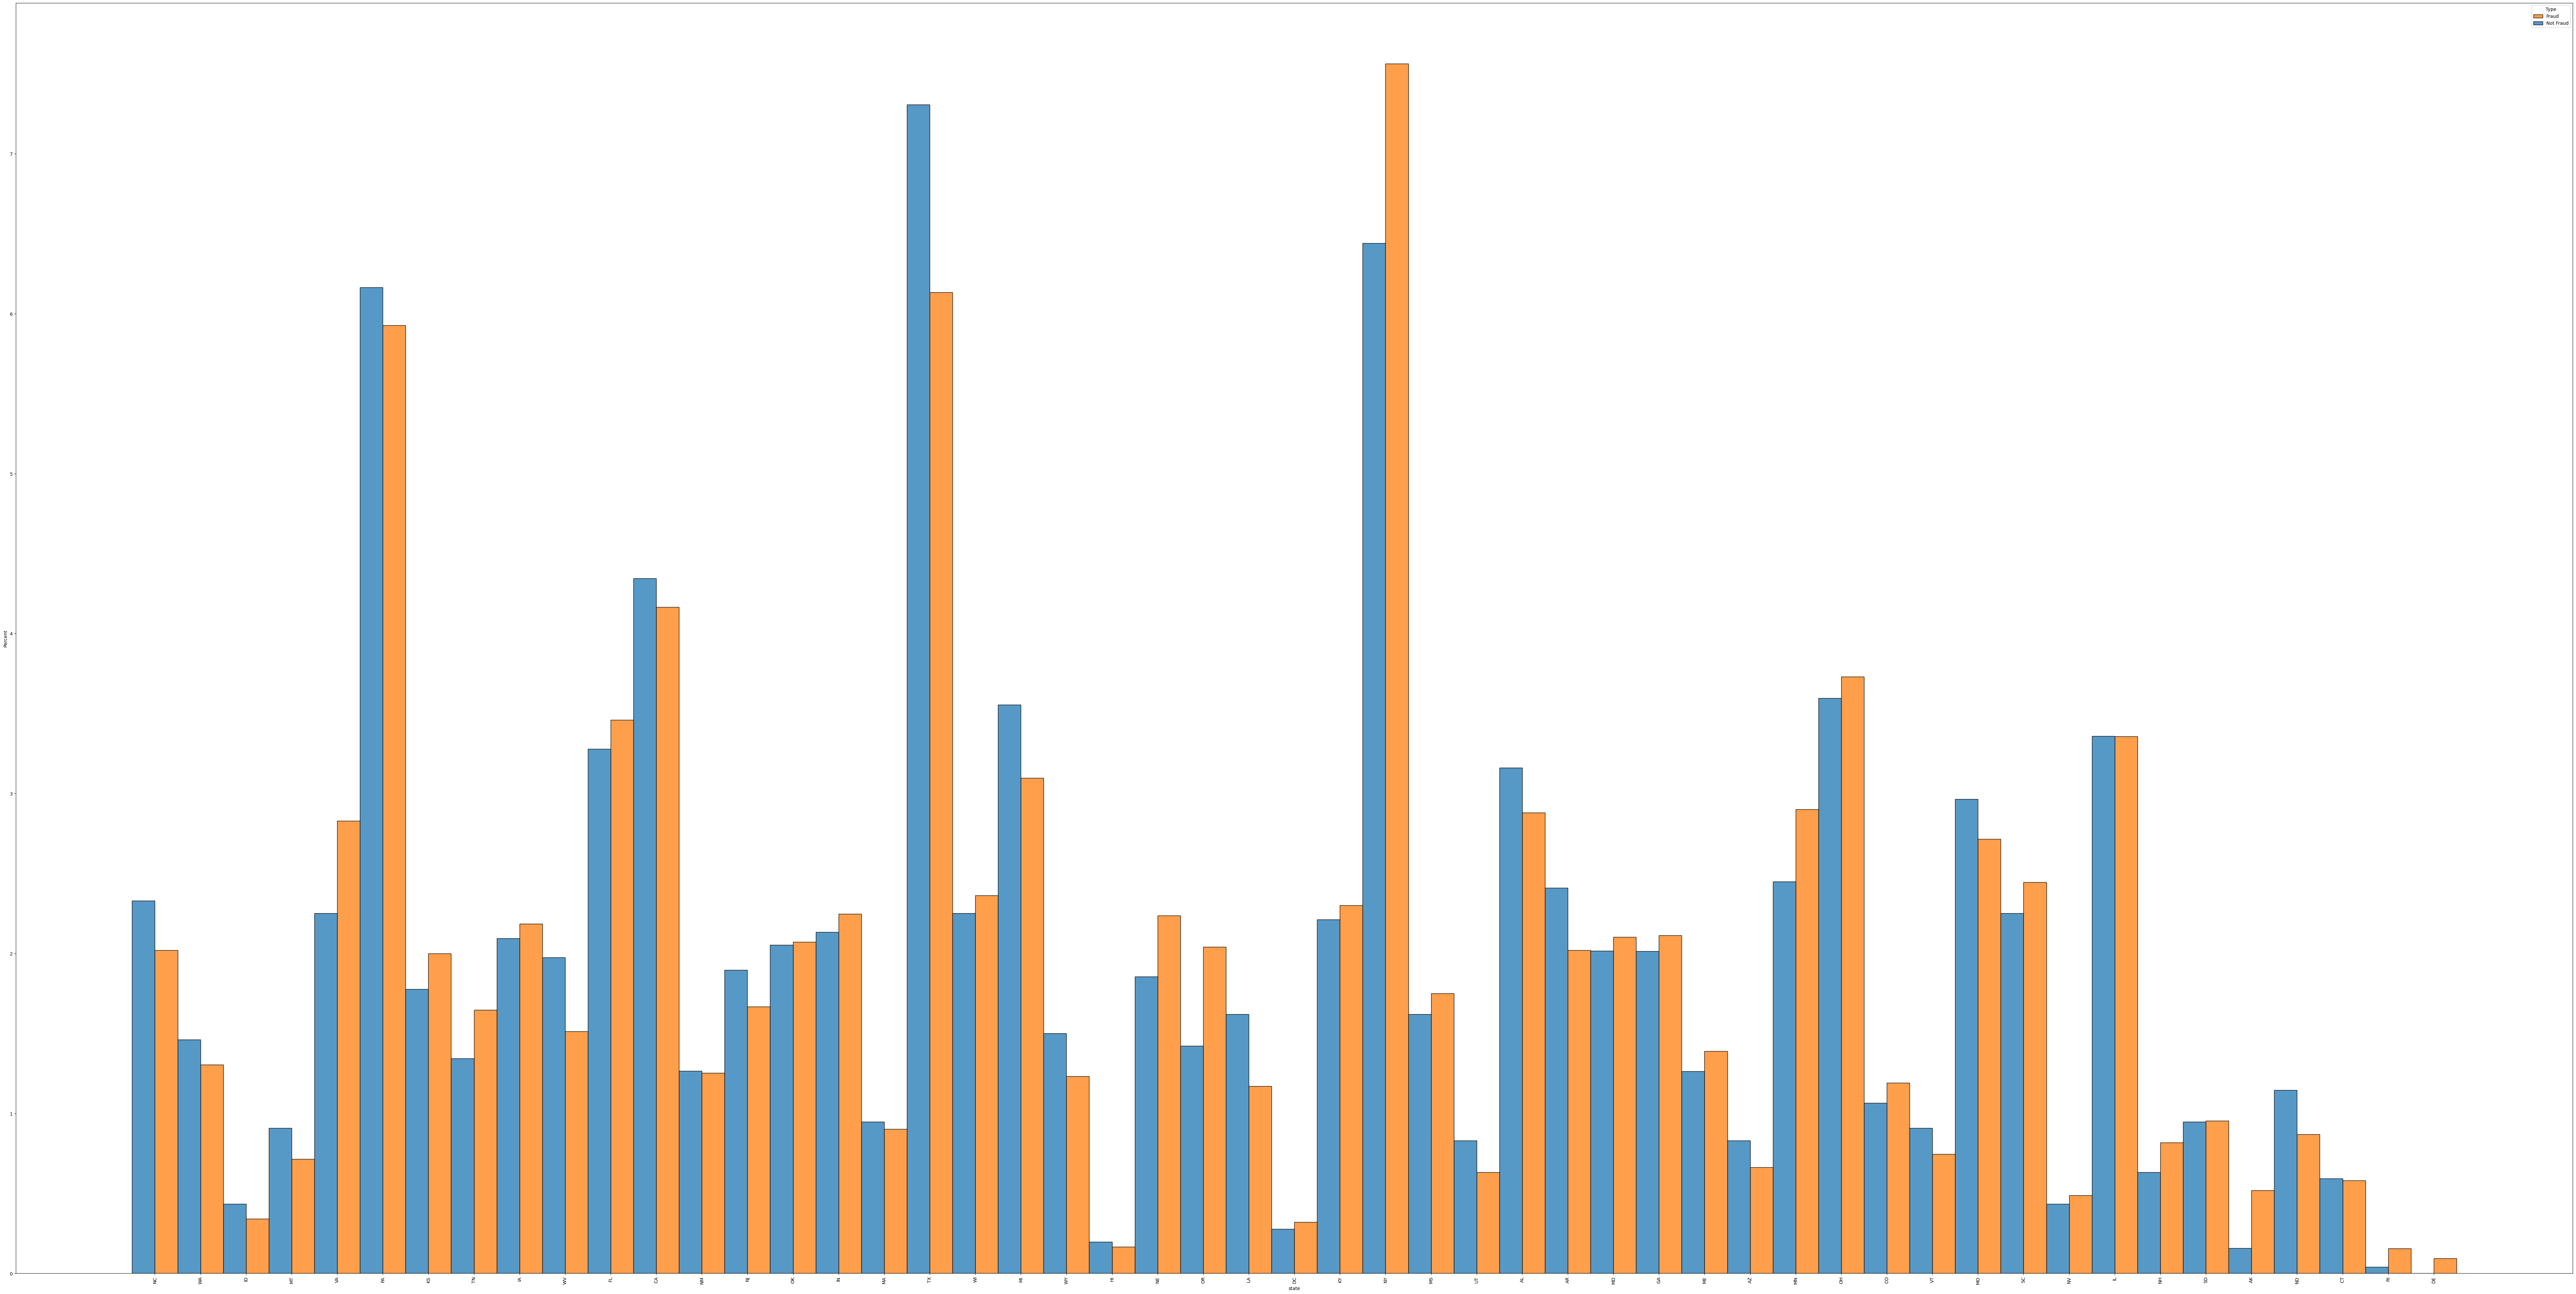

In [31]:
# State vs fraud
f, ax = plt.subplots(figsize=(100, 50))
ax=sns.histplot(x='state',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
plt.xticks(rotation=90)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show();

In [32]:
#lets view the state vs is_fraud, and see the persentage of fraud transactions accourding to age

df_state = df[['state','trans_num']].groupby(['state']).count().reset_index()
df_state.columns = ['State', 'All_Transactions']
df_fraud_state = df[['state', 'trans_num', 'is_fraud']].groupby(['state','is_fraud']).count().reset_index()
df_fraud_state.columns = ['State', 'Is_fraud', 'Fraud_Transactions']
df_fraud_state = df_fraud_state.merge(df_state[['State', 'All_Transactions']], how='inner', on='State')
df_fraud_state['Fraud_percentage'] = (df_fraud_state['Fraud_Transactions']/df_fraud_state['All_Transactions'])*100
df_fraud_state[df_fraud_state['Is_fraud'] == 1].sort_values(by = ['Fraud_percentage'], ascending=False)[:15]

State  Is_fraud  Fraud_Transactions  All_Transactions  Fraud_percentage
16    DE         1                   9                 9        100.000000
78    RI         1                  15               745          2.013423
1     AK         1                  50              2963          1.687479
74    OR         1                 197             26408          0.745986
60    NH         1                  79             11727          0.673659
90    VA         1                 273             41756          0.653798
84    TN         1                 159             24913          0.638221
58    NE         1                 216             34425          0.627451
46    MN         1                 280             45433          0.616292
68    NY         1                 730            119419          0.611293
15    DC         1                  31              5130          0.604288
32    KS         1                 193             32939          0.585932
66    NV         1                  47              8058          0.583271
11    CO         1                 115             19766          0.581807
42    ME         1                 134             23433          0.571843

<b><u>Conclusion:</u></b><br> What we see from the distribution of <b><u>state</u></b>,
The states 'PA', 'TX', 'NY' have the most transactions, and so there is a high chance of fraudt transaction happening in these states.
if we take a look at the top 15 states with most fraud transactions, we see that the state DE has the highest percent of fraud transactions with a percentage of 100% frauds. after that come RI and AK which are the next most fraud states compared to the amount of transactions made by them.<br>


In order to prevent this of happening, we can increase the monitoring of transactions in these specific states. And let the people in these states be aware and carefull. 

<b><u>City:</u></b><br>
Lets review the correlation between city and is_fraud 

In [33]:
print('number of cities: ',df.city.nunique())

number of cities:  906


It would be difficult to plot a feature with so many unique values.
therefor we will only visualize the 20 cities with the most transaction.

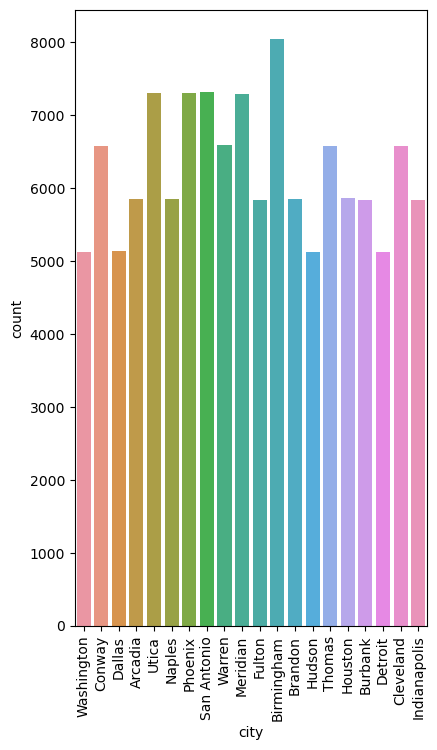

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
high_trans_cities = df.city.value_counts().head(20).index.tolist()
plot = sns.countplot(df[df.city.isin(high_trans_cities)].city, ax=plt.subplot(121))
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

We can see from the diagram above that most transactions take place in Birmingham and then in San Antonio.

<b>Now, we will take a look at the number of fraud transactions by city.

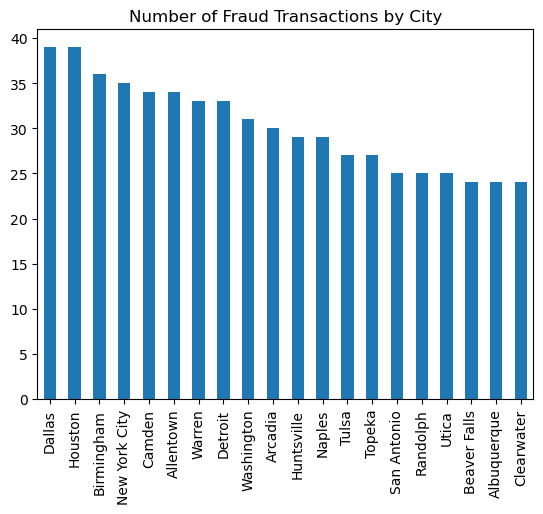

In [35]:
plt.rcParams.update({'font.size': 10})
df[df['is_fraud']==1]["city"].value_counts(sort=True,ascending=False).head(20).plot(kind="bar")
plt.title("Number of Fraud Transactions by City")
plt.show()

In [36]:
#constructing the city-transaction count distribution
df_city = df[['city','trans_num']].groupby(['city']).count().reset_index()
df_city.columns = ['city', 'city_count']

#city vs fraud
df_fraud_city = df[['city', 'trans_num', 'is_fraud']].groupby(['city','is_fraud']).count().reset_index()
df_fraud_city.columns = ['city', 'is_fraud', 'Transaction count']
df_fraud_city = df_fraud_city.merge(df_city[['city', 'city_count']], how='inner', on='city')
df_fraud_city['Transaction percentage'] = (df_fraud_city['Transaction count']/df_fraud_city['city_count'])*100
#cities with 100% fraud transactions
res = df_fraud_city.loc[(df_fraud_city.is_fraud == 1) & (df_fraud_city['Transaction percentage'] == 100)].city.tolist()

print('\nNumber of cities with 100% fraud transactions: ',len(res))
print(res,'\n')


res = df_fraud_city.loc[(df_fraud_city.is_fraud == 1) & (df_fraud_city['Transaction percentage'] > 5) & (df_fraud_city['Transaction percentage'] < 100)].city.tolist()

print('\nNumber of cities with more than 5% and less than 100% fraud transactions: ',len(res))

res = df_fraud_city.loc[(df_fraud_city.is_fraud == 1) & (df_fraud_city['Transaction percentage'] <5)].city.tolist()

print('\nNumber of cities with less than 5% fraud transactions: ',len(res))



Number of cities with 100% fraud transactions:  70
['Angwin', 'Ashland', 'Beacon', 'Brookfield', 'Bruce', 'Buellton', 'Byesville', 'Chattanooga', 'Clarion', 'Claypool', 'Clinton', 'Coulee Dam', 'Craig', 'Crouse', 'Downey', 'East China', 'Freeport', 'Gaines', 'Granbury', 'Greenport', 'Grenola', 'Grifton', 'Guthrie', 'Hubbell', 'Irvington', 'Isanti', 'Kaktovik', 'Karns City', 'Kirkwood', 'Kirtland', 'La Grande', 'Las Vegas', 'Lexington', 'Lockhart', 'Madisonville', 'Marshall', 'Medford', 'Melville', 'Mineral', 'Morrowville', 'Morven', 'Moss Point', 'Mount Vernon', 'Mountain City', 'Nanuet', 'Nicholson', 'Noblesville', 'Norfolk', 'North East', 'Oakton', 'Orange Park', 'Phelps', 'Pleasant Hill', 'Queen Anne', 'Rice', 'Ridge Spring', 'Roland', 'Seattle', 'Seligman', 'Senatobia', 'Springville', 'Streator', 'Vacaville', 'Walkertown', 'Wappapello', 'Wartburg', 'Waukau', 'West Frankfort', 'Wever', 'Winnsboro'] 


Number of cities with more than 5% and less than 100% fraud transactions:  0

Num

<b><u>Conclusion:</u></b><br> What we see from the distribution of <b><u>city</u></b>,
The cities that have most fraud transactions are Dallas, Houston and Birmingham.
if we take a look at the top cities with the highest percentage of fraud transactions compared to the number of transactions at those cities, we see that there are 70 cities with the percentage of 100% frauds. and then the rest of the cities have less than 5% frauds!<br>

In order to prevent this of happening, we can increase the monitoring of transactions in the cities with 100% frauds. And let the people in these cities be aware and carefull. 

<b><u>Job:</u></b><br>
Lets review the correlation between job and is_fraud 

In [37]:
#check how many different values the feature job contains
df.job.nunique()

497

It would be difficult to plot a feature with so many unique values.
therefor, just like we have done with the city feature we will only visualize the 20 jobs with the most transaction.

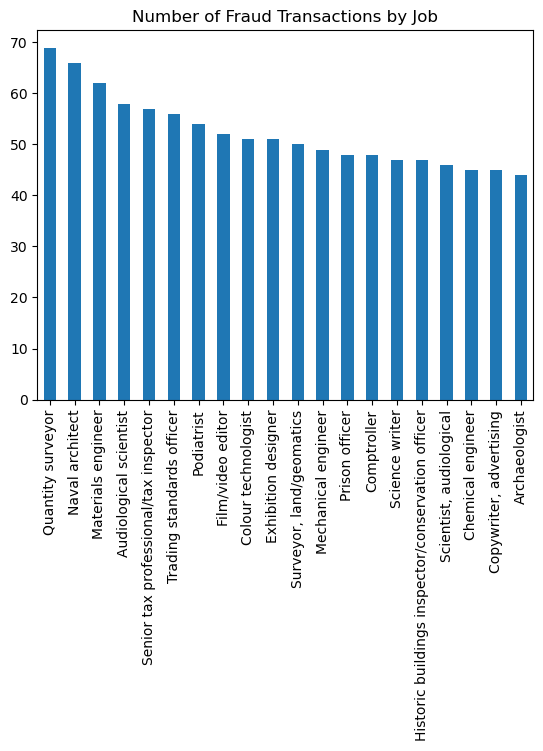

In [38]:
df[df['is_fraud']==1]["job"].value_counts(sort=True,ascending=False).head(20).plot(kind="bar")
plt.title("Number of Fraud Transactions by Job")
plt.show()

We can see that most frauds occured in the jobs quantity surveyor followed by naval architect and then materials engineer


In [39]:
#lets view the state vs is_fraud, and see the persentage of fraud transactions accourding to age

df_job = df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['Job', 'All_Transactions']
df_fraud_job = df[['job', 'trans_num', 'is_fraud']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['Job', 'Is_fraud', 'Fraud_Transactions']
df_fraud_job = df_fraud_job.merge(df_job[['Job', 'All_Transactions']], how='inner', on='Job')
df_fraud_job['Fraud_percentage'] = (df_fraud_job['Fraud_Transactions']/df_fraud_job['All_Transactions'])*100
df_fraud_job[df_fraud_job['Is_fraud'] == 1].sort_values(by = ['Fraud_percentage'], ascending=False)[:15]

Job  Is_fraud  Fraud_Transactions  \
444                          Homeopath         1                  11   
2                Accountant, chartered         1                  11   
393            Forest/woodland manager         1                   9   
834                  Software engineer         1                  11   
827                        Ship broker         1                   7   
68      Armed forces technical officer         1                   8   
228                             Dancer         1                  19   
796  Sales promotion account executive         1                  14   
39              Air traffic controller         1                  17   
99                Broadcast journalist         1                   9   
207         Contracting civil engineer         1                   7   
475                   Industrial buyer         1                  10   
478                Information officer         1                   8   
340                    Engineer, water         1                   8   
335                     Engineer, site         1                  12   

     All_Transactions  Fraud_percentage  
444                11             100.0  
2                  11             100.0  
393                 9             100.0  
834                11             100.0  
827                 7             100.0  
68                  8             100.0  
228                19             100.0  
796                14             100.0  
39                 17             100.0  
99                  9             100.0  
207                 7             100.0  
475                10             100.0  
478                 8             100.0  
340                 8             100.0  
335                12             100.0

In [40]:

#cities with 100% fraud transactions
res = df_fraud_job.loc[(df_fraud_job.Is_fraud == 1) & (df_fraud_job['Fraud_percentage'] == 100)].Job.tolist()

print('\nNumber of jobs with 100% fraud transactions: ',len(res))
print(res,'\n')


res = df_fraud_job.loc[(df_fraud_job.Is_fraud == 1) & (df_fraud_job['Fraud_percentage'] > 5) & (df_fraud_job['Fraud_percentage'] < 100)].Job.tolist()

print('\nNumber of jobs with more than 5% and less than 100% fraud transactions: ',len(res))

res = df_fraud_job.loc[(df_fraud_job.Is_fraud == 1) & (df_fraud_job['Fraud_percentage'] <5)].Job.tolist()

print('\nNumber of jobs with less than 5% fraud transactions: ',len(res))



Number of jobs with 100% fraud transactions:  22
['Accountant, chartered', 'Air traffic controller', 'Armed forces technical officer', 'Broadcast journalist', 'Careers adviser', 'Contracting civil engineer', 'Dancer', 'Engineer, site', 'Engineer, water', 'Forest/woodland manager', 'Homeopath', 'Industrial buyer', 'Information officer', 'Legal secretary', 'Operational investment banker', 'Personnel officer', 'Sales promotion account executive', 'Ship broker', 'Software engineer', 'Solicitor', 'Veterinary surgeon', 'Warehouse manager'] 


Number of jobs with more than 5% and less than 100% fraud transactions:  0

Number of jobs with less than 5% fraud transactions:  472


<b><u>Conclusion:</u></b><br> What we see from the distribution of <b><u>job</u></b>,
The jobs that have most fraud transactions are quantity surveyor, naval architect and materials engineer.

if we take a look at the above table, we can see that there are jobs with 100% fraud transactions compared to the number of transactions for those jobs, so we take a deeper look and see that there are 22 jobs with the percentage of 100% frauds. and then the rest of the jobs have less than 5% frauds!<br>

In order to prevent this of happening, we can increase the monitoring of transactions in the jobs with 100% frauds. And let the people in these jobs be aware and carefull. 


<b><h2>Insights from EDA:</h2></b><br>
<u>Category:</u><br> 
Most frauds occured in categories of shopping_net, misc_net and grocery_pos.<br>
<u>Amount:</u><br>
Fraud transactions mostly appear in higher amounts.<br>
<u>Gender:</u><br>
The percentage of fraud transactions in relation to all transtactions according to gender are a bit higher for transactions made by Male costumers.<br>
<u>Time:</u><br>
Most fraud transaction happend at the month of December, and The vast majority of fraud transactions happened between 10pm and 3am.<br>
<u>Age:</u><br>
We can see that the people in the age group of 75 and older have the highest percentage of fraud transactions, about 0.77% of the transaction made by them were fraud.<br>
<u>State:</u><br>
The state DE has the highest percent of fraud transactions with a percentage of 100% frauds. after that come RI and AK .<br>
<u>City:</u><br>
The cities that have most fraud transactions are Dallas, Houston and Birmingham. there are 70 cities with the percentage of 100% frauds. and then the rest of the cities have less than 5% frauds.<br>
<u>Job:</u><br>
The jobs that have most fraud transactions are quantity surveyor, naval architect and materials engineer. there are 22 jobs with the percentage of 100% frauds. and then the rest of the jobs have less than 5% frauds

<h1><b>Clustering using K- means


<h3>What Is Clustering?</h3><br>
Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters. In practice, clustering helps identify two qualities of data:<br>
1.Meaningfulness<br>
2.Usefulness<br>
Meaningful clusters expand domain knowledge. For example, in the medical field, researchers applied clustering to gene expression experiments. The clustering results identified groups of patients who respond differently to medical treatments.<br>
Useful clusters, on the other hand, serve as an intermediate step in a data pipeline. For example, businesses use clustering for customer segmentation. The clustering results segment customers into groups with similar purchase histories, which businesses can then use to create targeted advertising campaigns.

In [41]:
#lates take a look at our features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column             Dtype    
---  ------             -----    
 0   cc_num             int64    
 1   merchant           object   
 2   category           object   
 3   amt                float64  
 4   gender             object   
 5   street             object   
 6   city               object   
 7   state              object   
 8   zip                int64    
 9   lat                float64  
 10  long               float64  
 11  city_pop           int64    
 12  job                object   
 13  trans_num          object   
 14  unix_time          int64    
 15  merch_lat          float64  
 16  merch_long         float64  
 17  is_fraud           int64    
 18  trans_hour         int64    
 19  trans_day_of_week  object   
 20  trans_year_month   period[M]
 21  age                object   
dtypes: float64(5), int64(6), object(10), period[M](1)
memory usage: 32

<h3>Segmentation using amt and is_fraud

In [42]:
#Clustering
temp = df.copy()
#we will refer to a balanced sub group of our data
fraud_trans = temp[temp['is_fraud'] == 1][:200]
non_fraud_trans = temp[temp['is_fraud'] == 0][:200]
temp = pd.concat([fraud_trans, non_fraud_trans]).reset_index()
temp = shuffle(temp)
#lest clusture our data according to the amt feature
X1 = temp[['amt' , 'is_fraud']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

Next we will select N Clusters based on Inertia (Squared Distance between Centroids and data points)<br>
The lower values of inertia are better and zero is optimal.


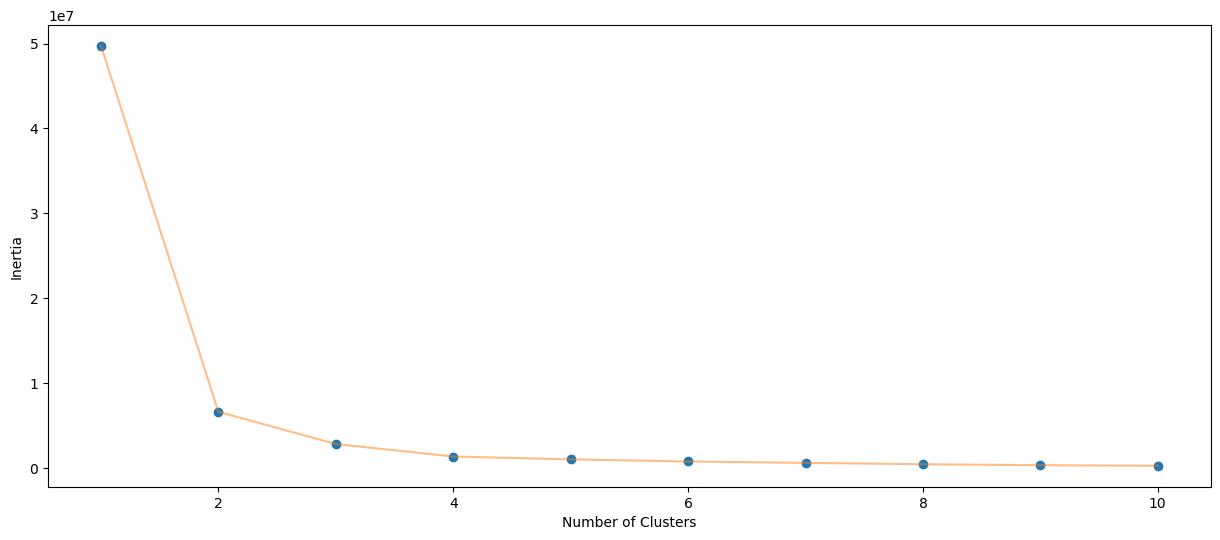

In [43]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [44]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [45]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

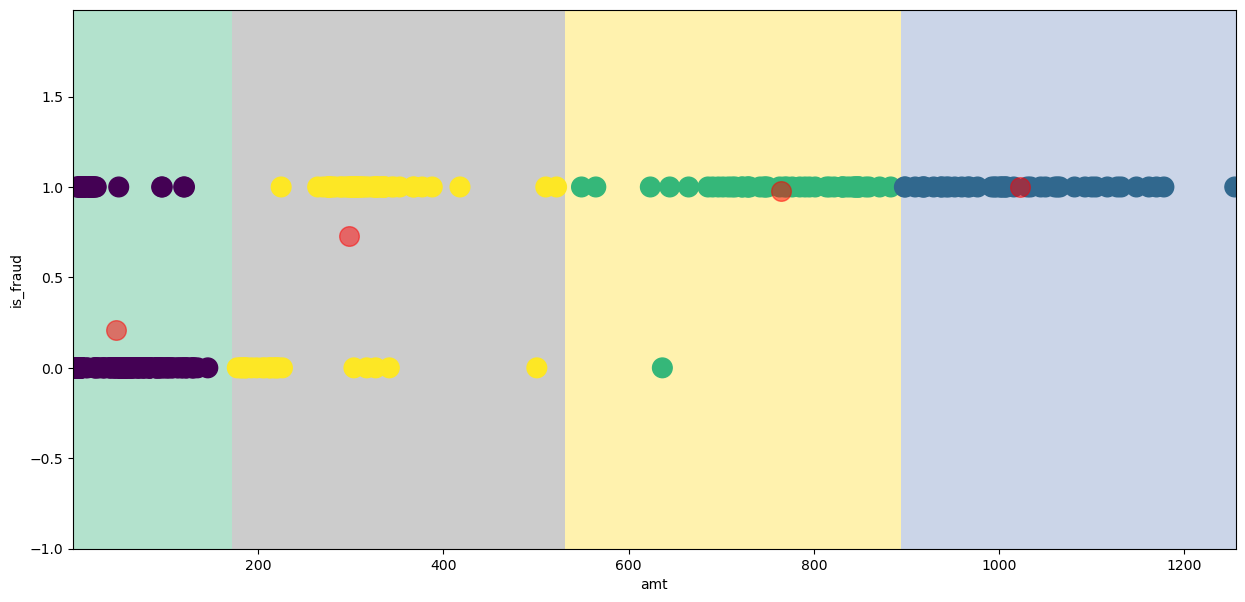

In [46]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'amt' ,y = 'is_fraud' , data = temp , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200 , c = 'red' , alpha = 0.5)
plt.ylabel('is_fraud') , plt.xlabel('amt')
plt.show()

<b><u>Conclusion:</u></b><br> What we see from the clustering of <b>amt vs is_fraud</b>,
is that the data splits very clearly into clusrets, where each cluster includes the tranfers which have simular features, for example:<br>the first cluster includes transfers where the amount is less than 180 and there are more Non frauds then frauds.
<br>the second cluster includes transfers where the amount is between 180 and 550 and there are about 50% Non frauds and 50% frauds.
<br>the third cluster includes transfers where the amount is between 550 and 900 and there are more frauds then Non frauds.
<br>the first cluster includes transfers where the amount is more than 900 and there are 100% frauds.

moreover, we can see that while the non fraud transactions are mostly up to 300UD, the fraud transactions appeard mostly in higher amounts, between 700 and 1100UD, which fits perfactly with the EDA result of amount.

<h3>Segmentation using trans_hour and is_fraud


In [47]:
#Clustering
temp = df.copy()
#lest clusture our data according to the trans_hour feature
X1 = temp[['trans_hour' , 'is_fraud']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

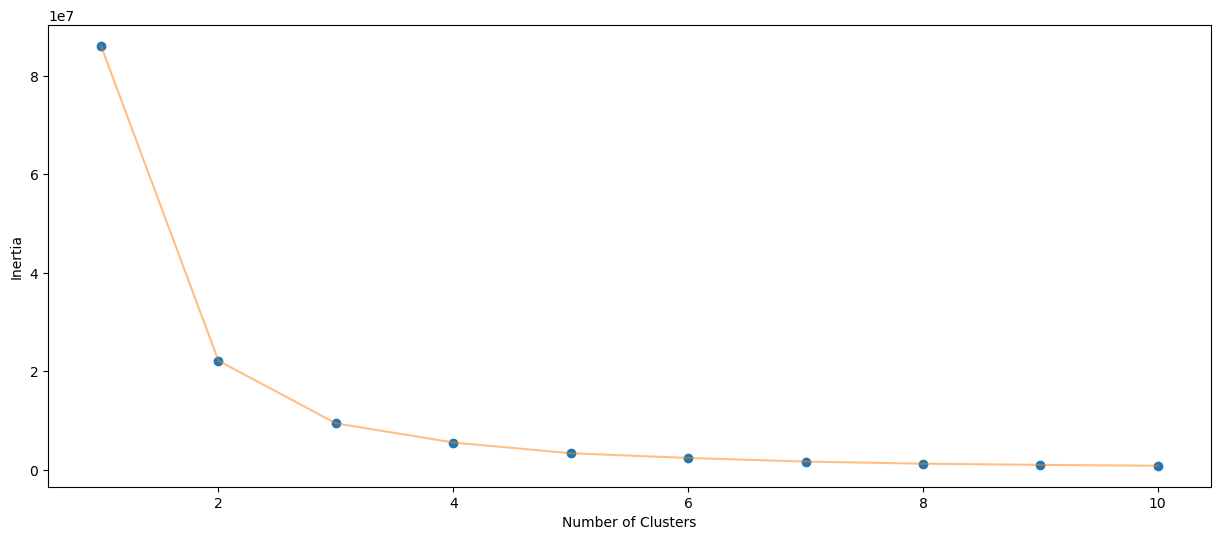

In [48]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [49]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [50]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

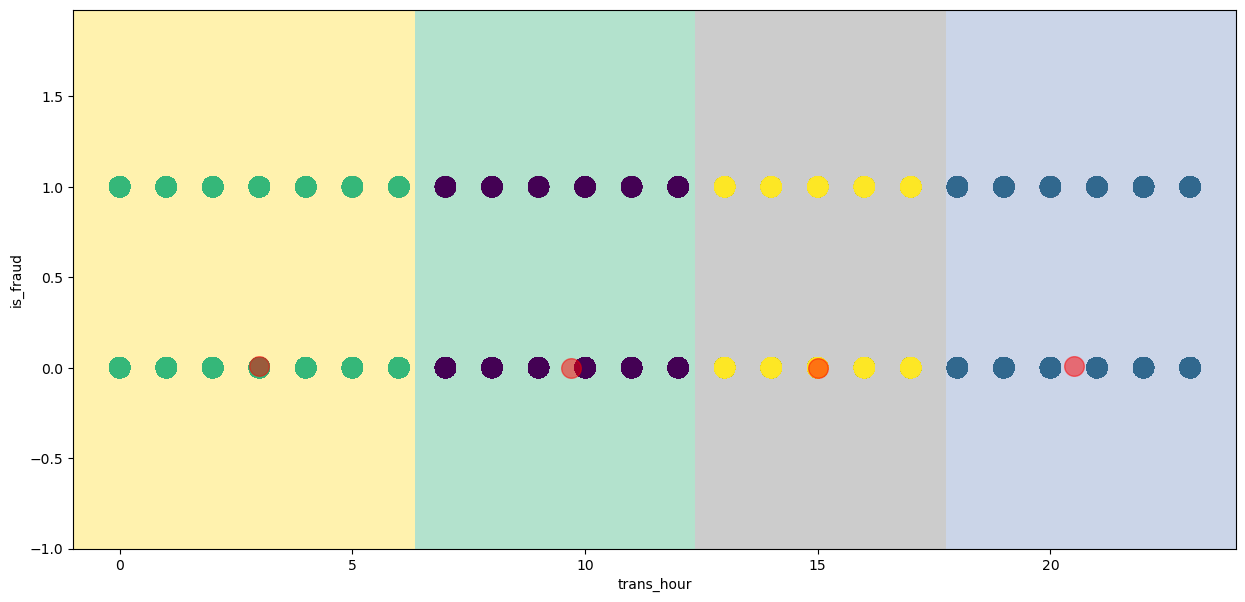

In [51]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'trans_hour' ,y = 'is_fraud' , data = temp , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200 , c = 'red' , alpha = 0.5)
plt.ylabel('is_fraud') , plt.xlabel('trans_hour')
plt.show()

<b><u>Conclusion:</u></b><br> What we see from the clustering of <b>trans_hour vs is_fraud</b>,
is that nothing can be deduced from this graph since most dots overlap (because we only have 24 optional places for fraud and 24 for Non fraud) and so we can not learn anything from this graph. is this case, clustering would not help us.

<h3>Segmentation using amt, trans_hour and is_fraud


In [52]:
temp = df.copy()
#we will refer to a balanced sub group of our data
fraud_trans = temp[temp['is_fraud'] == 1][:200]
non_fraud_trans = temp[temp['is_fraud'] == 0][:200]
temp = pd.concat([fraud_trans, non_fraud_trans]).reset_index()
X3 = temp[['amt' , 'trans_hour' ,'is_fraud']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

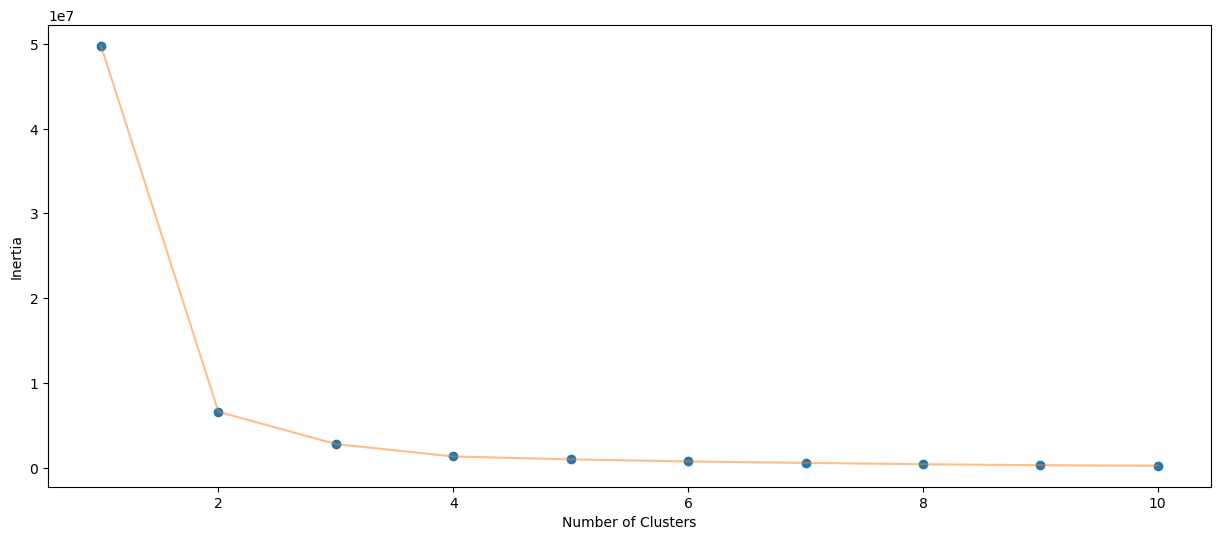

In [53]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [54]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_

centroids3 = algorithm.cluster_centers_

In [55]:

temp['label3'] =  labels3
trace1 = go.Scatter3d(
    x= temp['amt'],
    y= temp['trans_hour'],
    z= temp['is_fraud'],
    mode='markers',
     marker=dict(
        color = temp['label3'], 
        size= 20,
        line=dict(
            color= temp['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'amt'),
            yaxis = dict(title  = 'trans_hour'),
            zaxis = dict(title  = 'is_fraud')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

<h1><b>4. Feature Encoding


<b>Now that we are done with the EDA process, we will proceed with creating the dummy variables and encoding the required features in our dataset

<b>Convert gender to binary values

In [56]:
df.gender.value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

In [57]:
df.gender=df.gender.apply(lambda x: 1 if x=="F" else 0)
df.gender.value_counts()

1    1014749
0     837645
Name: gender, dtype: int64

<b>Next, According to our insights from EDA, we will now drop the variables that are no longer useful for building our model

According to our insights from EDA, we saw that the features amout, age, category, time, city and state all have varying degrees of correlations with credit card fraud. This helps us choose which features we want to include in our data models and which to drop. The plan is to train the models on the training data set which we have analyzed above and then use the testing dataset to evaluate the model performance, using different algorithms in order to compare and see which work best.

Since data models need numeric input, we will convert the needed data into numeric type turning it into dummy variables using pandas.get_dummies. (One Hot Encoding)



lets take a look our data and see which features we will drop and which features we will turn into numeric Dtype


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column             Dtype    
---  ------             -----    
 0   cc_num             int64    
 1   merchant           object   
 2   category           object   
 3   amt                float64  
 4   gender             int64    
 5   street             object   
 6   city               object   
 7   state              object   
 8   zip                int64    
 9   lat                float64  
 10  long               float64  
 11  city_pop           int64    
 12  job                object   
 13  trans_num          object   
 14  unix_time          int64    
 15  merch_lat          float64  
 16  merch_long         float64  
 17  is_fraud           int64    
 18  trans_hour         int64    
 19  trans_day_of_week  object   
 20  trans_year_month   period[M]
 21  age                object   
dtypes: float64(5), int64(7), object(9), period[M](1)
memory usage: 325

We can see that the type of category, gender, trans_day_of_week, and age are of type object and so we will convert them into numeric:

In [59]:
df = pd.get_dummies(df,columns=['category', 'gender', 'trans_day_of_week', 'age'],drop_first=True)

Lets see what our data set looks like now:

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 41 columns):
 #   Column                       Dtype    
---  ------                       -----    
 0   cc_num                       int64    
 1   merchant                     object   
 2   amt                          float64  
 3   street                       object   
 4   city                         object   
 5   state                        object   
 6   zip                          int64    
 7   lat                          float64  
 8   long                         float64  
 9   city_pop                     int64    
 10  job                          object   
 11  trans_num                    object   
 12  unix_time                    int64    
 13  merch_lat                    float64  
 14  merch_long                   float64  
 15  is_fraud                     int64    
 16  trans_hour                   int64    
 17  trans_year_month             period[M]
 18  ca

We can see above that we got the wanted features converted to int, and they were added to our data set

In [61]:
df.head()

cc_num                            merchant     amt  \
0  2703186189652095          fraud_Rippin, Kub and Mann    4.97   
1      630423337322     fraud_Heller, Gutmann and Zieme  107.23   
2    38859492057661                fraud_Lind-Buckridge  220.11   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell   45.00   
4   375534208663984                 fraud_Keeling-Crist   41.96   

                         street            city state    zip      lat  \
0                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2      594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4              408 Bradley Rest        Doe Hill    VA  24433  38.4207   

       long  city_pop  ... gender_1 trans_day_of_week_Monday  \
0  -81.1781      3495  ...        1                        0   
1 -118.2105       149  ...        1                        0   
2 -112.2620      4154  ...        0                        0   
3 -112.1138      1939  ...        0                        0   
4  -79.4629        99  ...        0                        0   

   trans_day_of_week_Saturday  trans_day_of_week_Sunday  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   trans_day_of_week_Thursday  trans_day_of_week_Tuesday  \
0                           0                          1   
1                           0                          1   
2                           0                          1   
3                           0                          1   
4                           0                          1   

   trans_day_of_week_Wednesday age_50-75  age_< 25  age_> 75  
0                            0         0         0         0  
1                            0         0         0         0  
2                            0         1         0         0  
3                            0         1         0         0  
4                            0         0         0         0  

[5 rows x 41 columns]

Now we will drop the not needed features according to our previous research insights.
the features merchant, street, city, zip, state, job can be dropped since they have a lot of unique values and it is hard to encode all of them.<br>
Then, after we converted the following features into int and added them previously to the data set, the features - age, category, gender, trans_day_of_week, lat, long, merch_lat, merch_long can be dropped as well.<br>
And last, the features cc_num, trans_num, city_pop and unix_time are not significant in context of our analysis and so they too can be removed.

In [62]:
df=df.drop(['cc_num', 'trans_num', 'merchant', 'street','city','state','job','lat','long','merch_lat','merch_long', 'zip', 'city_pop', 'unix_time'],axis=1)


In [63]:
df.shape

(1852394, 27)

In [64]:
df.columns

Index(['amt', 'is_fraud', 'trans_hour', 'trans_year_month',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_1', 'trans_day_of_week_Monday', 'trans_day_of_week_Saturday',
       'trans_day_of_week_Sunday', 'trans_day_of_week_Thursday',
       'trans_day_of_week_Tuesday', 'trans_day_of_week_Wednesday', 'age_50-75',
       'age_< 25', 'age_> 75'],
      dtype='object')

<b>lets take a look at the correlations between the columns in our data set

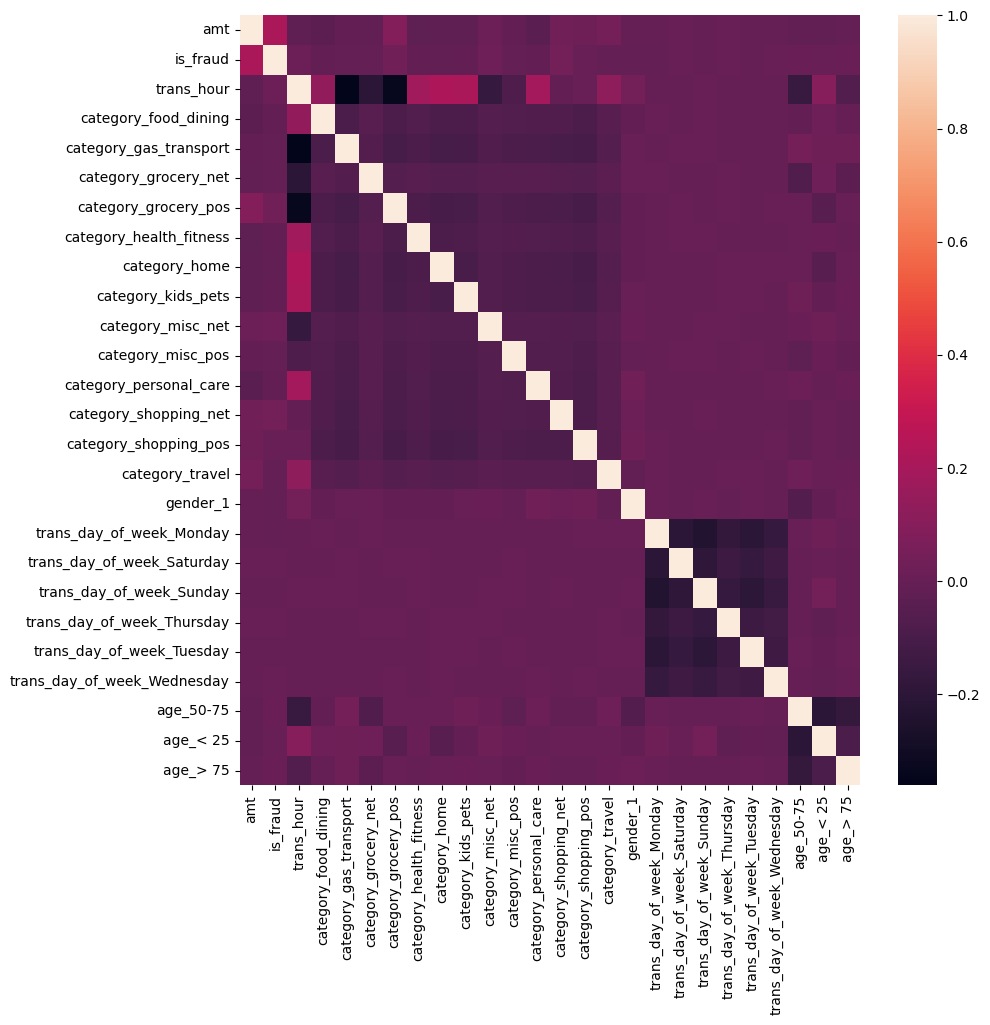

In [65]:
df_random_under_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_random_under_corr)
plt.show()

From the heatmap above we can see that the amount is highly correlated with is_fraud and the categories of shopping_net, misc_nec and grocery_pos are highly correlated with is_fraud as well. which turns out just like our EDA conclutions.

<h1><b>5. Feature scaling

In [66]:
#store the number of values in each class
non_fraud_count, fraud_count = df.is_fraud.value_counts()

In [67]:
#storing the numerical columns of the data and removing unnecessary variables
df_num = df.select_dtypes(include='number')
df_num.columns

Index(['amt', 'is_fraud', 'trans_hour', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_1',
       'trans_day_of_week_Monday', 'trans_day_of_week_Saturday',
       'trans_day_of_week_Sunday', 'trans_day_of_week_Thursday',
       'trans_day_of_week_Tuesday', 'trans_day_of_week_Wednesday', 'age_50-75',
       'age_< 25', 'age_> 75'],
      dtype='object')

Lets see what Dtypes our data contains now

In [68]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   amt                          float64
 1   is_fraud                     int64  
 2   trans_hour                   int64  
 3   category_food_dining         uint8  
 4   category_gas_transport       uint8  
 5   category_grocery_net         uint8  
 6   category_grocery_pos         uint8  
 7   category_health_fitness      uint8  
 8   category_home                uint8  
 9   category_kids_pets           uint8  
 10  category_misc_net            uint8  
 11  category_misc_pos            uint8  
 12  category_personal_care       uint8  
 13  category_shopping_net        uint8  
 14  category_shopping_pos        uint8  
 15  category_travel              uint8  
 16  gender_1                     uint8  
 17  trans_day_of_week_Monday     uint8  
 18  trans_day_of_week_Saturday   uint8  
 19  

<b>Feature Scaling</b><br>
as we can see, now our data contains only numerical feilds

In [69]:
#innput-output split
X = df_num.drop(['is_fraud'],axis=1)
y = df_num.is_fraud

#scale data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

<h1><b>6. Implementing Algorithms


In this section, we will be building different models using a variety of algorithms, and we will try and compare between them and conclude which give us the best result, which are the best for our use.

Now that our data is ready, we will split the data into a train group and a test group, usind stratified K fold

In [70]:
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

y_train.value_counts(normalize=True)


0    0.994791
1    0.005209
Name: is_fraud, dtype: float64

In [71]:
fraud = df[df.is_fraud == 1]
normal = df[df.is_fraud == 0]
print(f'Normal transactions: {len(normal)} out of {len(df)}, {round(len(normal)/len(df) * 100,3)} % of the dataset')
print(f'Fraud transactions:  {len(fraud)} out of {len(df)}, {round(len(fraud)/len(df) * 100,3)} % of the dataset')

Normal transactions: 1842743 out of 1852394, 99.479 % of the dataset
Fraud transactions:  9651 out of 1852394, 0.521 % of the dataset


In [72]:

labels=["Genuine","Fraud"]

fig = px.pie(values=df["is_fraud"].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs NonFraud transactions")
fig.show()

Notice how the dataset is totally imbalanced, We can see that an overwhelming majority of the transactions are non-fraud. If we use this dataframe for predicting we might get a wrong accuracy and our algorithms will probably overfit by assuming that most transactions are not fraud. so we will want to balance our dataset before making any predictions. but first we will take a look at what happens working with the imbalanced data set.

<h3>Logistic Regression on our imbalanced dataset

In [73]:
#Create a model usind our imbalanced data set
lr = LogisticRegression(random_state=42)
logit_model = lr.fit(X_train, y_train)
y_train_pred = logit_model.predict(X_train)
y_test_pred = logit_model.predict(X_test)
print("Model successfully created")

Model successfully created


<b>Now lets evaluating the model

In [74]:
model_name = 'Logistic Regression Using Imbalanced Dataset'

train_score = logit_model.score(X_train,y_train)
test_score = logit_model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)


Lest take a look at the performance of our model

In [75]:
#print model performance
print("Model name: ", model_name)
print("-------------------------------")
print("Train score: ", train_score)
print("-------------------------------")
print("Test score: ", test_score)
print("-------------------------------")
print("Acc score: ", acc_score)
print("-------------------------------")
print("F1 score: ", f_score)
print("-------------------------------")
print("precision: ", precision)
print("-------------------------------")
print("recall: ", recall)


Model name:  Logistic Regression Using Imbalanced Dataset
-------------------------------
Train score:  0.9944709386879897
-------------------------------
Test score:  0.9944525840614902
-------------------------------
Acc score:  0.9944525840614902
-------------------------------
F1 score:  0.9920607121385151
-------------------------------
precision:  0.054285714285714284
-------------------------------
recall:  0.003937007874015748


In [76]:
logit_model.coef_

array([[ 0.36701141,  0.95795617, -0.11175392,  0.6346989 ,  0.36235429,
         0.88988679, -0.17601765, -0.21239101, -0.10131759,  0.5322916 ,
         0.19230354, -0.06642022,  0.52697267,  0.30408953, -0.94913568,
        -0.15698343, -0.15647392, -0.05125761, -0.15451535, -0.03082497,
        -0.02696912, -0.00112168,  0.40600166,  0.07145929,  0.31862058]])

Next, we will create a table where we will compare the different models that we will build

In [77]:
#create table to compare the performance of the different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

Model Name  Training Score  \
0  Logistic Regression Using Imbalanced Dataset        0.994471   

   Testing Score  Accuracy  F1 Score  Precision    Recall  
0       0.994453  0.994453  0.992061   0.054286  0.003937

<b><u>Conclusion:</u></b><br> What we see from the <b>Logistic Regression Using Imbalanced Dataset Model</b>,
is that the impacts of our data set being imbalance:
From the above dataframe it can be seen that although our data set is imbalance, the performance of the model seems great.
This would make sence because, since there is no balance in the dataset at this point, the model predicts almost all of data points as not fraud. We shall relize, the model is predicting most fraud transactions as not fraud too, but since there are very few fraud transactions in our data set the impact is small and the overall accuracy is good.
This clearly is not the right model for us, since we need to balance our dataset in order to build a fair model that will predict correctly for fraud transactions.

<h3>Lets get on to Feature Balancing</h3>
As we mentioned, the dataset is totaly imbalanced - the number of fraud transactions are only about 0.5% of the total dataset.
This case might create bias in our model building process, therefore we will now balance our dataset by performing oversampling/undersampling. we will be using the stratified k-fold cross validation for training and validating our models with the different algorithms used to build the models.<br>
We will be using the X_train and y_train obtained from the stratified k-Fold split that we created above for training our models and use the X_test and y_test to test our models.
We will be balancing only the data in X_train and y_train datasets, and for testing our models we will still use the imbalanced data of X_test and y_test.

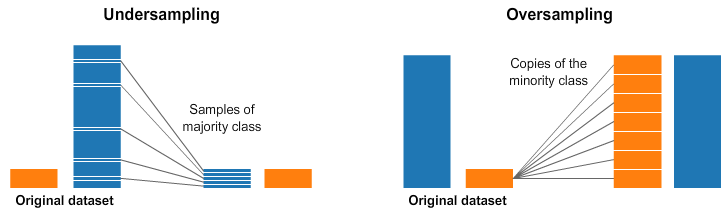

<h3>Random Under Sampling</h3><br>
<b>for this, we will use the sample method to randomly choose the total number of data points from majority class as in the minority class.

<b>The first algorithm we will use with our Random Under Sampled data is Logistic Regression:	

In [78]:
#random under sampling using imblearn
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train,y_train)
y_rus.value_counts()

0    4825
1    4825
Name: is_fraud, dtype: int64

As we can see, now our data contains 50% frauds and 50% non frauds. 

<b>Train-Test Split:</b><br>
Next, we will split our balanced data into train-test groups using stratify = y_rus (our target variable) in order to have an equal number of samples from each class in our split.

In [79]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)
y_train_us.value_counts()

1    3378
0    3377
Name: is_fraud, dtype: int64

Let us now build a Logistic Regression model in order to analyze this data after undersampling .

In [80]:
#creating a Logistic Regression model
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train_us, y_train_us)
y_train_pred = model.predict(X_train_us)
y_train_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
#predict
test_pred=model.predict(X_test)
test_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [82]:
#classification report of the model
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    921371
           1       0.03      0.75      0.06      4826

    accuracy                           0.87    926197
   macro avg       0.51      0.81      0.49    926197
weighted avg       0.99      0.87      0.93    926197



In [83]:
#evaluating the model
model_name = 'Logistic Regression Using Random Under Sampling'
train_score = model.score(X_train_us,y_train_us)
test_score = model.score(X_test_us,y_test_us)
acc_score = accuracy_score(y_test,test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = metrics.recall_score(y_test,test_pred)

In [84]:
#print model performance
print("Model name: ", model_name)
print("-------------------------------")
print("Train score: ", train_score)
print("-------------------------------")
print("Test score: ", test_score)
print("-------------------------------")
print("Acc score: ", acc_score)
print("-------------------------------")
print("F1 score: ", f_score)
print("-------------------------------")
print("precision: ", precision)
print("-------------------------------")
print("recall: ", recall)

Model name:  Logistic Regression Using Random Under Sampling
-------------------------------
Train score:  0.81139896373057
-------------------------------
Test score:  0.8155440414507772
-------------------------------
Acc score:  0.8716320609978223
-------------------------------
F1 score:  0.9265736492354969
-------------------------------
precision:  0.02983364384284372
-------------------------------
recall:  0.7498963945296312


In [85]:
#adding to table
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

Model Name  Training Score  \
0     Logistic Regression Using Imbalanced Dataset        0.994471   
1  Logistic Regression Using Random Under Sampling        0.811399   

   Testing Score  Accuracy  F1 Score  Precision    Recall  
0       0.994453  0.994453  0.992061   0.054286  0.003937  
1       0.815544  0.871632  0.926574   0.029834  0.749896

<b><u>Conclusion:</u></b><br> What we see from the <b>Logistic Regression Using Random Under Sampeling</b>,
is that the performance of the model is quite accurate, although seems less accurate than the previous model- the results are realistic and suit our problem better. we will now take a look at some more models.

<b>The Next algorithm will be Keras using our Random Under Sampled data:

In [86]:
model = models.Sequential()
model.add(layers.Dense(10, input_shape=(X_train_us.shape[1],), activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                260       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [88]:
class_weight = compute_class_weight(class_weight="balanced",classes=np.unique(y_train_us),y=y_train_us)
class_weight

array([1.00014806, 0.99985198])

In [89]:
weights = {
    0:0.5,
    1:300
}
callback = EarlyStopping(monitor='loss', patience=3)

In [90]:
history = model.fit(X_train_us, 
                    y_train_us, 
                    epochs=100, 
                    batch_size=64,
                    validation_data=(X_test_us, y_test_us),
                    class_weight = weights,
                   callbacks=[callback])

Epoch 1/100
106/106 [==============================] - 2s 8ms/step - loss: 59.9757 - accuracy: 0.5340 - val_loss: 0.9754 - val_accuracy: 0.4998
Epoch 2/100
106/106 [==============================] - 0s 3ms/step - loss: 11.0562 - accuracy: 0.5001 - val_loss: 1.6194 - val_accuracy: 0.4998
Epoch 3/100
106/106 [==============================] - 0s 3ms/step - loss: 4.2739 - accuracy: 0.5001 - val_loss: 2.1850 - val_accuracy: 0.4998
Epoch 4/100
106/106 [==============================] - 0s 3ms/step - loss: 2.4300 - accuracy: 0.5001 - val_loss: 2.6231 - val_accuracy: 0.4998
Epoch 5/100
106/106 [==============================] - 0s 3ms/step - loss: 1.9508 - accuracy: 0.5001 - val_loss: 2.8449 - val_accuracy: 0.4998
Epoch 6/100
106/106 [==============================] - 0s 3ms/step - loss: 1.8337 - accuracy: 0.5001 - val_loss: 2.9059 - val_accuracy: 0.4998
Epoch 7/100
106/106 [==============================] - 0s 3ms/step - loss: 1.7781 - accuracy: 0.5001 - val_loss: 2.8970 - val_accuracy: 0.49

Epoch 58/100
106/106 [==============================] - 0s 2ms/step - loss: 0.8498 - accuracy: 0.6552 - val_loss: 1.4338 - val_accuracy: 0.6674
Epoch 59/100
106/106 [==============================] - 0s 2ms/step - loss: 0.8425 - accuracy: 0.6811 - val_loss: 1.4227 - val_accuracy: 0.6929
Epoch 60/100
106/106 [==============================] - 0s 2ms/step - loss: 0.8312 - accuracy: 0.6905 - val_loss: 1.4075 - val_accuracy: 0.7029
Epoch 61/100
106/106 [==============================] - 0s 2ms/step - loss: 0.8259 - accuracy: 0.6976 - val_loss: 1.3485 - val_accuracy: 0.7085
Epoch 62/100
106/106 [==============================] - 0s 2ms/step - loss: 0.8170 - accuracy: 0.7026 - val_loss: 1.3872 - val_accuracy: 0.7136
Epoch 63/100
106/106 [==============================] - 0s 2ms/step - loss: 0.8062 - accuracy: 0.7104 - val_loss: 1.3678 - val_accuracy: 0.7157
Epoch 64/100
106/106 [==============================] - 0s 2ms/step - loss: 0.7881 - accuracy: 0.7156 - val_loss: 1.4002 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


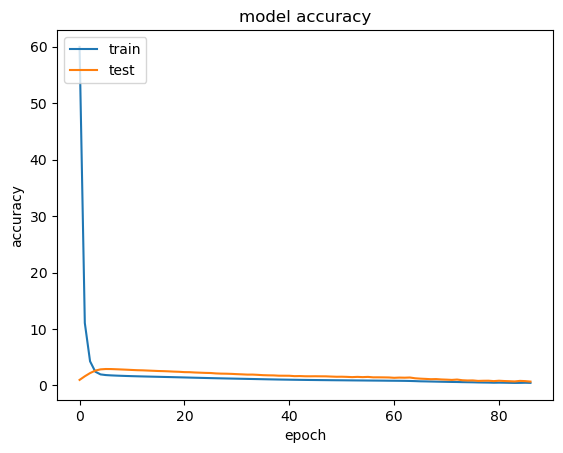

In [91]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
val_predictions = model.predict(X_test_us)
print(val_predictions)
preds = np.around(val_predictions)

91/91 [==============================] - 0s 1ms/step
[[9.9999583e-01]
 [9.7050703e-01]
 [7.2688003e-05]
 ...
 [4.0230888e-01]
 [9.9998099e-01]
 [9.9909371e-01]]


In [93]:
print(classification_report(y_test_us, preds))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82      1448
           1       0.77      1.00      0.87      1447

    accuracy                           0.85      2895
   macro avg       0.88      0.85      0.85      2895
weighted avg       0.88      0.85      0.85      2895



In [94]:
model_name = 'Keras Using Random Under Sampling'
test_score, acc = model.evaluate(X_test_us,y_test_us)
acc_score = history.history['val_accuracy'][-1]
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = metrics.recall_score(y_test,test_pred)

91/91 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.8501


In [95]:
#print model performance
print("Model name: ", model_name)
print("-------------------------------")
print("Train score: ", test_score)
print("-------------------------------")
print("Test score: ", test_score)
print("-------------------------------")
print("Acc score: ", acc_score)
print("-------------------------------")
print("F1 score: ", f_score)
print("-------------------------------")
print("precision: ", precision)
print("-------------------------------")
print("recall: ", recall)

Model name:  Keras Using Random Under Sampling
-------------------------------
Train score:  0.679184079170227
-------------------------------
Test score:  0.679184079170227
-------------------------------
Acc score:  0.8500863313674927
-------------------------------
F1 score:  0.9265736492354969
-------------------------------
precision:  0.02983364384284372
-------------------------------
recall:  0.7498963945296312


In [96]:
#adding to table
model_eval_data = [model_name, test_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

Model Name  Training Score  \
0     Logistic Regression Using Imbalanced Dataset        0.994471   
1  Logistic Regression Using Random Under Sampling        0.811399   
2                Keras Using Random Under Sampling        0.679184   

   Testing Score  Accuracy  F1 Score  Precision    Recall  
0       0.994453  0.994453  0.992061   0.054286  0.003937  
1       0.815544  0.871632  0.926574   0.029834  0.749896  
2       0.679184  0.850086  0.926574   0.029834  0.749896

<b><u>Conclusion:</u></b><br> What we see from the <b>Keras Using Random Under Sampeling</b> algorithm,
although we were very interested to see the results of using keras, which enables us to easily build the model and gets us to results quickly, we can see that the performance of the model is less accurate, and so we will go on to the next model.

<b>The Next algorithm will be Decision Tree Classifier using our Random Under Sampled data:

In [97]:
#Random Under Sampled data using Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=10)
model = dtree.fit(X_train_us,y_train_us)
test_pred = model.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    921371
           1       0.10      0.97      0.19      4826

    accuracy                           0.96    926197
   macro avg       0.55      0.96      0.58    926197
weighted avg       1.00      0.96      0.97    926197



In [98]:
#evaluating the model
model_name = 'Decision Tree Using Random Under Sampling'
train_score = model.score(X_train_us,y_train_us)
test_score = model.score(X_test_us,y_test_us)
acc_score = accuracy_score(y_test,test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = metrics.recall_score(y_test,test_pred)

In [99]:
#print model performance
print("Model name: ", model_name)
print("-------------------------------")
print("Train score: ", train_score)
print("-------------------------------")
print("Test score: ", test_score)
print("-------------------------------")
print("Acc score: ", acc_score)
print("-------------------------------")
print("F1 score: ", f_score)
print("-------------------------------")
print("precision: ", precision)
print("-------------------------------")
print("recall: ", recall)

Model name:  Decision Tree Using Random Under Sampling
-------------------------------
Train score:  0.9814951887490747
-------------------------------
Test score:  0.9682210708117444
-------------------------------
Acc score:  0.9556271505953917
-------------------------------
F1 score:  0.9730678719959324
-------------------------------
precision:  0.10264668507076816
-------------------------------
recall:  0.9707832573559884


In [100]:
#adding to table
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

Model Name  Training Score  \
0     Logistic Regression Using Imbalanced Dataset        0.994471   
1  Logistic Regression Using Random Under Sampling        0.811399   
2                Keras Using Random Under Sampling        0.679184   
3        Decision Tree Using Random Under Sampling        0.981495   

   Testing Score  Accuracy  F1 Score  Precision    Recall  
0       0.994453  0.994453  0.992061   0.054286  0.003937  
1       0.815544  0.871632  0.926574   0.029834  0.749896  
2       0.679184  0.850086  0.926574   0.029834  0.749896  
3       0.968221  0.955627  0.973068   0.102647  0.970783

<b><u>Conclusion:</u></b><br> What we see from the <b>Decision Tree Using Random Under Sampeling</b> algorithm,
is that the performance of the model is very accurate, giving us an accuracy of 96% and a f1 score of 97%.

<h3>Random Over Sampling</h3><br>
Now we will take a look at the diffrent models by using Random oversampling, Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

In [101]:
#oversampling with imblearn
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train,y_train)
y_ros.value_counts()

0    921372
1    921372
Name: is_fraud, dtype: int64

<b>The first algorithm will be Decision Tree Classifier using our Random Over Sampled data:

In [102]:
#train-test split
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_ros,y_ros, test_size=0.3, random_state=42)
dtree = DecisionTreeClassifier(max_depth=10)
model = dtree.fit(X_train_os,y_train_os)
test_pred = model.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    921371
           1       0.13      0.97      0.23      4826

    accuracy                           0.97    926197
   macro avg       0.56      0.97      0.61    926197
weighted avg       1.00      0.97      0.98    926197



In [103]:
#print model performance
print("Model name: ", model_name)
print("-------------------------------")
print("Train score: ", train_score)
print("-------------------------------")
print("Test score: ", test_score)
print("-------------------------------")
print("Acc score: ", acc_score)
print("-------------------------------")
print("F1 score: ", f_score)
print("-------------------------------")
print("precision: ", precision)
print("-------------------------------")
print("recall: ", recall)

Model name:  Decision Tree Using Random Under Sampling
-------------------------------
Train score:  0.9814951887490747
-------------------------------
Test score:  0.9682210708117444
-------------------------------
Acc score:  0.9556271505953917
-------------------------------
F1 score:  0.9730678719959324
-------------------------------
precision:  0.10264668507076816
-------------------------------
recall:  0.9707832573559884


In [104]:
#evaluate model
model_name = 'Decision Tree Using Random Over Sampling'
train_score = model.score(X_train_os,y_train_os)
test_score = model.score(X_test_os,y_test_os)
acc_score = accuracy_score(y_test,test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = metrics.recall_score(y_test,test_pred)

In [105]:
#add to table
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

Model Name  Training Score  \
0     Logistic Regression Using Imbalanced Dataset        0.994471   
1  Logistic Regression Using Random Under Sampling        0.811399   
2                Keras Using Random Under Sampling        0.679184   
3        Decision Tree Using Random Under Sampling        0.981495   
4         Decision Tree Using Random Over Sampling        0.979342   

   Testing Score  Accuracy  F1 Score  Precision    Recall  
0       0.994453  0.994453  0.992061   0.054286  0.003937  
1       0.815544  0.871632  0.926574   0.029834  0.749896  
2       0.679184  0.850086  0.926574   0.029834  0.749896  
3       0.968221  0.955627  0.973068   0.102647  0.970783  
4       0.979496  0.965855  0.978608   0.129039  0.965810

<b><u>Conclusion:</u></b><br> What we see from the <b>Decision Tree Using Random Over Sampeling</b> algorithm,
is that the performance of the model is very accurate, giving us an similar accuracy to our previous model, the Decision Tree - Random Under Sampling model.

<b>The next algorithm will be Random Forest Classifier using our Random Over Sampled data:

In [106]:
#train-test split
rf = RandomForestClassifier(n_estimators=100, criterion='gini')
model = rf.fit(X_train_os,y_train_os)

test_pred = model.predict(X_test)

print(classification_report(y_test, test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    921371
           1       0.80      0.81      0.80      4826

    accuracy                           1.00    926197
   macro avg       0.90      0.90      0.90    926197
weighted avg       1.00      1.00      1.00    926197



In [107]:
#evaluate model
model_name = 'Random Forest Using Random Over Sampling'
train_score = model.score(X_train_os,y_train_os)
test_score = model.score(X_test_os,y_test_os)
acc_score = accuracy_score(y_test,test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = metrics.recall_score(y_test,test_pred)

In [108]:
#print model performance
print("Model name: ", model_name)
print("-------------------------------")
print("Train score: ", train_score)
print("-------------------------------")
print("Test score: ", test_score)
print("-------------------------------")
print("Acc score: ", acc_score)
print("-------------------------------")
print("F1 score: ", f_score)
print("-------------------------------")
print("precision: ", precision)
print("-------------------------------")
print("recall: ", recall)

Model name:  Random Forest Using Random Over Sampling
-------------------------------
Train score:  0.9999914723393699
-------------------------------
Test score:  0.9995079808401951
-------------------------------
Acc score:  0.9979291662572866
-------------------------------
F1 score:  0.9979386812276341
-------------------------------
precision:  0.7957689178193653
-------------------------------
recall:  0.8106092001657688


In [109]:
#add to table
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

Model Name  Training Score  \
0     Logistic Regression Using Imbalanced Dataset        0.994471   
1  Logistic Regression Using Random Under Sampling        0.811399   
2                Keras Using Random Under Sampling        0.679184   
3        Decision Tree Using Random Under Sampling        0.981495   
4         Decision Tree Using Random Over Sampling        0.979342   
5         Random Forest Using Random Over Sampling        0.999991   

   Testing Score  Accuracy  F1 Score  Precision    Recall  
0       0.994453  0.994453  0.992061   0.054286  0.003937  
1       0.815544  0.871632  0.926574   0.029834  0.749896  
2       0.679184  0.850086  0.926574   0.029834  0.749896  
3       0.968221  0.955627  0.973068   0.102647  0.970783  
4       0.979496  0.965855  0.978608   0.129039  0.965810  
5       0.999508  0.997929  0.997939   0.795769  0.810609

<b><u>Conclusion:</u></b><br> What we see from the <b>Random Forest Using Random Over Sampeling</b> algorithm,
is that the performance of the model is very accurate, giving us the highest accuracy till now.
lets take look at more algorithms.

<h3>SMOTE (Synthetic Minority Oversampling Technique)</h3><br>
Smote is an oversampling technique, but SMOTE works differently than your typical oversampling.<br>
In a classic oversampling technique, the minority data is duplicated from the minority data population. While it increases the number of data, it does not give any new information or variation to the machine learning model.<br>
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

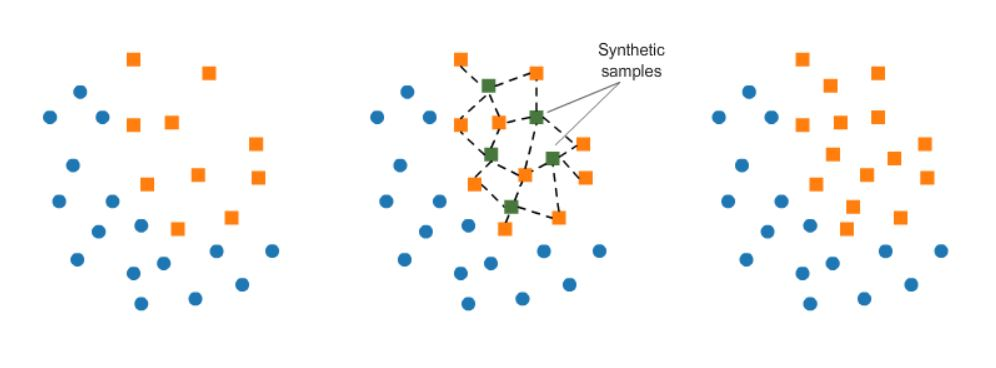

<b>Lets get a deeper Understanding of SMOTE:</b><br>
in order to solve an imbalanced dataset, SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority classes.<br>
Location of the synthetic points: <br>
SMOTE picks the distance between the closest neighbors of the minority class, and then in between these distances it creates synthetic points.<br>
Final Effect:<br>
More information is retained since unlike random under sampling, we didn't delete any information. <br>
Accuracy and Time Tradeoff:<br>
Although it is likely that SMOTE will be more accurate than random under sampling, it will take more time to train since no rows are eliminated as previously stated.<br>

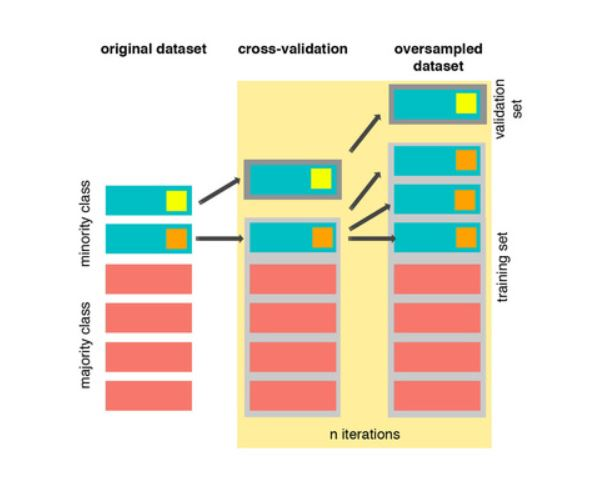

<b>For the first algorithm we will implement Logistic Regression on our data balanced by SMOTE:

In [110]:
#balancing using SMOTE method
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train.astype('float'), y_train)
y_sm.value_counts()

0    921372
1    921372
Name: is_fraud, dtype: int64

In [111]:
#train test split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm)
y_train.value_counts()

0    921372
1      4825
Name: is_fraud, dtype: int64

In [112]:
#implement logistic regression
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train_sm, y_train_sm)
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [113]:
test_pred = model.predict(X_test)
test_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [114]:
#printing classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    921371
           1       0.03      0.75      0.06      4826

    accuracy                           0.87    926197
   macro avg       0.51      0.81      0.49    926197
weighted avg       0.99      0.87      0.93    926197



In [115]:
#evaluating the model
model_name = 'Logistic Regression Using SMOTE'
train_score = model.score(X_train_sm,y_train_sm)
test_score = model.score(X_test_sm,y_test_sm)
acc_score = accuracy_score(y_test,test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = metrics.recall_score(y_test,test_pred)

In [116]:
#print model performance
print("Model name: ", model_name)
print("-------------------------------")
print("Train score: ", train_score)
print("-------------------------------")
print("Test score: ", test_score)
print("-------------------------------")
print("Acc score: ", acc_score)
print("-------------------------------")
print("F1 score: ", f_score)
print("-------------------------------")
print("precision: ", precision)
print("-------------------------------")
print("recall: ", recall)

Model name:  Logistic Regression Using SMOTE
-------------------------------
Train score:  0.809498263458199
-------------------------------
Test score:  0.8098364036293648
-------------------------------
Acc score:  0.8708168996444601
-------------------------------
F1 score:  0.9261065576394144
-------------------------------
precision:  0.02983400076980403
-------------------------------
recall:  0.7548694571073352


In [117]:
#add to table
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

Model Name  Training Score  \
0     Logistic Regression Using Imbalanced Dataset        0.994471   
1  Logistic Regression Using Random Under Sampling        0.811399   
2                Keras Using Random Under Sampling        0.679184   
3        Decision Tree Using Random Under Sampling        0.981495   
4         Decision Tree Using Random Over Sampling        0.979342   
5         Random Forest Using Random Over Sampling        0.999991   
6                  Logistic Regression Using SMOTE        0.809498   

   Testing Score  Accuracy  F1 Score  Precision    Recall  
0       0.994453  0.994453  0.992061   0.054286  0.003937  
1       0.815544  0.871632  0.926574   0.029834  0.749896  
2       0.679184  0.850086  0.926574   0.029834  0.749896  
3       0.968221  0.955627  0.973068   0.102647  0.970783  
4       0.979496  0.965855  0.978608   0.129039  0.965810  
5       0.999508  0.997929  0.997939   0.795769  0.810609  
6       0.809836  0.870817  0.926107   0.029834  0.754869

<b><u>Conclusion:</u></b><br> What we see from the <b>Logistic Regression Using SMOTE</b> algorithm,
is that the performance of the model is fine, there were more accurate models weve seen beforehand, notice that this model gives us very similar results to the Logistic Regression Using Random Under Sampling algorithm.
lets take look at more algorithms based on SMOTE.

<b>The next algorithm we will implement Decision Tree on our data balanced by SMOTE:

In [118]:
#train-test split
dtree = DecisionTreeClassifier(max_depth=10)
model = dtree.fit(X_train_sm,y_train_sm)
test_pred = model.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    921371
           1       0.12      0.96      0.21      4826

    accuracy                           0.96    926197
   macro avg       0.56      0.96      0.59    926197
weighted avg       1.00      0.96      0.98    926197



In [119]:
#evaluating the model
model_name = 'Decision Tree Using SMOTE'
train_score = model.score(X_train_sm,y_train_sm)
test_score = model.score(X_test_sm,y_test_sm)
acc_score = accuracy_score(y_test,test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = metrics.recall_score(y_test,test_pred)

In [120]:
#print model performance
print("Model name: ", model_name)
print("-------------------------------")
print("Train score: ", train_score)
print("-------------------------------")
print("Test score: ", test_score)
print("-------------------------------")
print("Acc score: ", acc_score)
print("-------------------------------")
print("F1 score: ", f_score)
print("-------------------------------")
print("precision: ", precision)
print("-------------------------------")
print("recall: ", recall)

Model name:  Decision Tree Using SMOTE
-------------------------------
Train score:  0.9760078144381047
-------------------------------
Test score:  0.9753592463424164
-------------------------------
Acc score:  0.961761914581887
-------------------------------
F1 score:  0.9763802958999481
-------------------------------
precision:  0.1162242183971496
-------------------------------
recall:  0.9598010774968918


In [121]:
#add to table
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

Model Name  Training Score  \
0     Logistic Regression Using Imbalanced Dataset        0.994471   
1  Logistic Regression Using Random Under Sampling        0.811399   
2                Keras Using Random Under Sampling        0.679184   
3        Decision Tree Using Random Under Sampling        0.981495   
4         Decision Tree Using Random Over Sampling        0.979342   
5         Random Forest Using Random Over Sampling        0.999991   
6                  Logistic Regression Using SMOTE        0.809498   
7                        Decision Tree Using SMOTE        0.976008   

   Testing Score  Accuracy  F1 Score  Precision    Recall  
0       0.994453  0.994453  0.992061   0.054286  0.003937  
1       0.815544  0.871632  0.926574   0.029834  0.749896  
2       0.679184  0.850086  0.926574   0.029834  0.749896  
3       0.968221  0.955627  0.973068   0.102647  0.970783  
4       0.979496  0.965855  0.978608   0.129039  0.965810  
5       0.999508  0.997929  0.997939   0.795769  0.810609  
6       0.809836  0.870817  0.926107   0.029834  0.754869  
7       0.975359  0.961762  0.976380   0.116224  0.959801

<b><u>Conclusion:</u></b><br> What we see from the <b>Decision Tree Using SMOTE</b> algorithm,
is that the performance of the model is very good, giving us a very high accuracy of 97%, notice that this model gives us very similar results to the Decision Tree Using Random Over Sampling algorithm.
lets take look at one more algorithm based on SMOTE.

<b>The next algorithm we will implement Random Forest Classifier on our data balanced by SMOTE:

In [122]:
#train-test split
rf = RandomForestClassifier(n_estimators=100, criterion='gini')
model = rf.fit(X_train_sm,y_train_sm)
test_pred = model.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    921371
           1       0.61      0.85      0.71      4826

    accuracy                           1.00    926197
   macro avg       0.81      0.92      0.85    926197
weighted avg       1.00      1.00      1.00    926197



In [123]:
#evaluate the model
model_name = 'Random Forest Using SMOTE'
train_score = model.score(X_train_sm,y_train_sm)
test_score = model.score(X_test_sm,y_test_sm)
acc_score = accuracy_score(y_test,test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = metrics.recall_score(y_test,test_pred)


In [124]:
#print model performance
print("Model name: ", model_name)
print("-------------------------------")
print("Train score: ", train_score)
print("-------------------------------")
print("Test score: ", test_score)
print("-------------------------------")
print("Acc score: ", acc_score)
print("-------------------------------")
print("F1 score: ", f_score)
print("-------------------------------")
print("precision: ", precision)
print("-------------------------------")
print("recall: ", recall)

Model name:  Random Forest Using SMOTE
-------------------------------
Train score:  0.999989921855619
-------------------------------
Test score:  0.9972848501512236
-------------------------------
Acc score:  0.9963960151026185
-------------------------------
F1 score:  0.9966879439455926
-------------------------------
precision:  0.6109454220101401
-------------------------------
recall:  0.8489432242022379


In [125]:
#add to table
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

Model Name  Training Score  \
0     Logistic Regression Using Imbalanced Dataset        0.994471   
1  Logistic Regression Using Random Under Sampling        0.811399   
2                Keras Using Random Under Sampling        0.679184   
3        Decision Tree Using Random Under Sampling        0.981495   
4         Decision Tree Using Random Over Sampling        0.979342   
5         Random Forest Using Random Over Sampling        0.999991   
6                  Logistic Regression Using SMOTE        0.809498   
7                        Decision Tree Using SMOTE        0.976008   
8                        Random Forest Using SMOTE        0.999990   

   Testing Score  Accuracy  F1 Score  Precision    Recall  
0       0.994453  0.994453  0.992061   0.054286  0.003937  
1       0.815544  0.871632  0.926574   0.029834  0.749896  
2       0.679184  0.850086  0.926574   0.029834  0.749896  
3       0.968221  0.955627  0.973068   0.102647  0.970783  
4       0.979496  0.965855  0.978608   0.129039  0.965810  
5       0.999508  0.997929  0.997939   0.795769  0.810609  
6       0.809836  0.870817  0.926107   0.029834  0.754869  
7       0.975359  0.961762  0.976380   0.116224  0.959801  
8       0.997285  0.996396  0.996688   0.610945  0.848943

<b><u>Conclusion:</u></b><br> What we see from the <b>Random Forest Using SMOTE</b> algorithm,
is that the performance of the model is great, giving us a very high accuracy of 99%, notice that this model gives us very similar results to the Random Forest Using Random Over Sampling algorithm.

<b>Now that we have implemented different algorithms, compared them and drew conclusions from each of them seperately, we can now conclude from the result table that:</b><br>
1. Out of all the algorithms used for model building, the Random Forest Algorithm gives the best results.
2. Out of all the Random Forest Algorithms, the Random Forest Using Random Over Sampling is the most accurate algorithm and gives the best result.
3. With that been said, we will choose to use the <b>Random Forest Using SMOTE</b> for building our model, since the SMOTE algorithm creates values according to its neighbors unlike the random over sampling algorithm which just creates duplicates of existing values. Therefore, the SMOTE algorithm would be most reliable for our model building.

************************************************************************************************************************

<h2>Overall Conclusion:

<b>Pre processing:</b>
1. In order to get more information from the trans_date_trans_time column, we separated it into hour, day, and Month-year column, and added the new columns to our original dataset
2. We found the age of the customer according to the time of transacting and his date of birth
3. We drop these columns since we will be using the new retrieved columns

<b>EDA:</b>
1. Category:<br> 
Most frauds occured in categories of shopping_net, misc_net and grocery_pos.<br>
2. Amount:<br>
While normal transactions tend to be up to 250USD, we see fraud transactions peak around 300USD and then at the 700-1100 range. clearly, fraud transactions mostly appear in higher amounts.<br>
3. Gender:<br>
Although more cases of fraud happen with female customers, the percentage of fraud transactions in relation to all transtactions according to gender are very close, being a bit higher for transactions made by Male costumers.<br>
4. Time:<br>
Most fraud transaction happend at the month of December, and The vast majority of fraud transactions happened between 10pm and 3am.<br>
5. Age:<br>
While most fraud transaction happen by people in the 25-50 age group, the people in the age group of 75 and older have been the most affected, having about 0.77% of fraud transactions.<br>
6. State:<br>
The states 'PA', 'TX', 'NY' have the most transactions, and so there is a high chance of fraudt transaction happening in these states.
The state DE has the highest percent of fraud transactions with a percentage of 100% frauds. after that come RI and AK which are the next most fraud states compared to the amount of transactions made by them.
7. City:<br>
The cities that have highest number of fraud transactions are Dallas, Houston and Birmingham. But, there are 70 other cities with the percentage of 100% frauds. and then the rest of the cities have less than 5% frauds.<br>
8. Job:<br>
The jobs that have most fraud transactions are quantity surveyor, naval architect and materials engineer.
There are 22 other jobs with the percentage of 100% frauds. and then the rest of the jobs have less than 5% frauds.


<b>Feature Encoding:</b><br>
According to our EDA insights above:
1. We drop the unnecessary features  and convert the others to numeric
2. We scale our data using standardscalar

<b>Implementing Algorithms:</b>
1. Out of all the algorithms used for model building, the Random Forest Algorithm gives the best results.
2. Out of all the Random Forest Algorithms, the Random Forest Using Random Over Sampling is the most accurate algorithm and gives the best result.
3. With that been said, we will choose to use the <b>Random Forest Using SMOTE</b> for building our model, since the SMOTE algorithm creates values according to its neighbors unlike the random over sampling algorithm which just creates duplicates of existing values. Therefore, the SMOTE algorithm would be most reliable for our model building.


<h2>Self reflection:

First we would like to say how much we enjoyed working on this project, from the very first part of choosing our topic, and then step by step developing each part untill we reached the very final result. Working on this project gave us a real practical expariance, and helped us develop our data science skills to a new level. We have learned a lot and got exposed to so many new consepts while researching, experimenting and analyzing each step, starting with finding the right dataset to work with and continuing with learning different analyzing tools, algorithms and modeling.<br><br>

We felt like we received in the course all the tools we needed to succeed, we were givin the right guidance in each lesson, so that even when we met with challenges we had all the tools to cope, we knew where and how to look things up, and so we had the resources to succeed. Thank you!!<br><br>

Some of the challenges we faced during working on the project were:
1. finding the right dataset to work with, a dataset that includes anough information in order to realy be able to learn from and create usfull models. when we first started, we chose the most popular dataset, googles credit card dataset, which contained only two unhidden features, but unfortunately, since that didnt fit the project requirements, we had to go on and switch our dataset and start over working with the new better dataset we found.
2. working with an imbalanced dataset - this was a challange we faced while triyng to create different models and seing that the results were not realistic. So eventually we realized that the problem was that we were working with an imbalanced dataset, and so we researched the subject and learned new tools how to deal with the problem.

we realy enjoyed working on the project together, and since we both wanted to understand each and every step of the way thoroughly, we worked in full cooperation together on each and every step of the way. we got together for hours and hours and we are really excited to present the final result!
 